In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from scipy.stats import shapiro, wilcoxon
import numpy as np

In [321]:
# Marital Status
marital_status_dict = {
    1: "Single",
    2: "Married",
    3: "Widower",
    4: "Divorced",
    5: "Facto Union",
    6: "Legally Separated"
}

# Application Mode
application_mode_dict = {
    1: "1st phase - General Contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - Special Contingent (Azores Island)",
    7: "Holders of Other Higher Courses",
    10: "Ordinance No. 854-B/99",
    15: "International Student (Bachelor)",
    16: "1st phase - Special Contingent (Madeira Island)",
    17: "2nd phase - General Contingent",
    18: "3rd phase - General Contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 Years Old",
    42: "Transfer",
    43: "Change of Course",
    44: "Technological Specialization Diploma Holders",
    51: "Change of Institution/Course",
    53: "Short Cycle Diploma Holders",
    57: "Change of Institution/Course (International)"
}

# Daytime/Evening Attendance
attendance_dict = {
    1: "Daytime",
    0: "Evening"
}

# Previous Qualification
previous_qualification_dict = {
    1: "Secondary Education",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    15: "10th Year of Schooling - Not Completed",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)"
}

course = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

# Nationality
nationality_dict = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}

# Mother's Qualification (same structure as Father's Qualification)
mother_qualification_dict = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-Professional Course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read Without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}

# Father's Qualification (same structure as Mother's Qualification)
father_qualification_dict = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)",
}

# Mother's Occupation
mother_occupation_dict = {
    0: "Student",
    1: "Legislative & Executive Representatives, Directors, Managers",
    2: "Intellectual & Scientific Professionals",
    3: "Intermediate Level Technicians & Professions",
    4: "Administrative Staff",
    5: "Personal Services, Security, Safety Workers & Sellers",
    6: "Farmers & Skilled Workers in Agriculture, Fisheries & Forestry",
    7: "Skilled Industry, Construction & Craft Workers",
    8: "Machine Operators & Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "Blank",
    122: "Health Professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Science & Engineering Technicians",
    132: "Health Technicians",
    134: "Legal, Social, Cultural & Sports Technicians",
    141: "Office Workers & Secretaries",
    143: "Accounting & Financial Services Staff",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Skilled Construction Workers",
    173: "Jewelers, Artisans & Craft Workers",
    175: "Food, Clothing & Woodworking Industry Workers",
    191: "Cleaning Workers",
    192: "Unskilled Agriculture & Fisheries Workers",
    193: "Unskilled Industry & Transport Workers",
    194: "Meal Preparation Assistants"
}

# Father's Occupation (same structure as Mother's Occupation with additional categories)


father_occupation_dict = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "Teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "Assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

In [322]:
df = pd.read_csv(r'C:\Users\Willian Murayama\github\introducao-a-ciencia-de-dados\datasets\redict Students Dropout and Academic Success.csv',delimiter=";")

In [323]:
display(df.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [324]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

None

In [325]:
display(df.describe())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


[0 2 1]
['Dropout' 'Graduate' 'Enrolled']


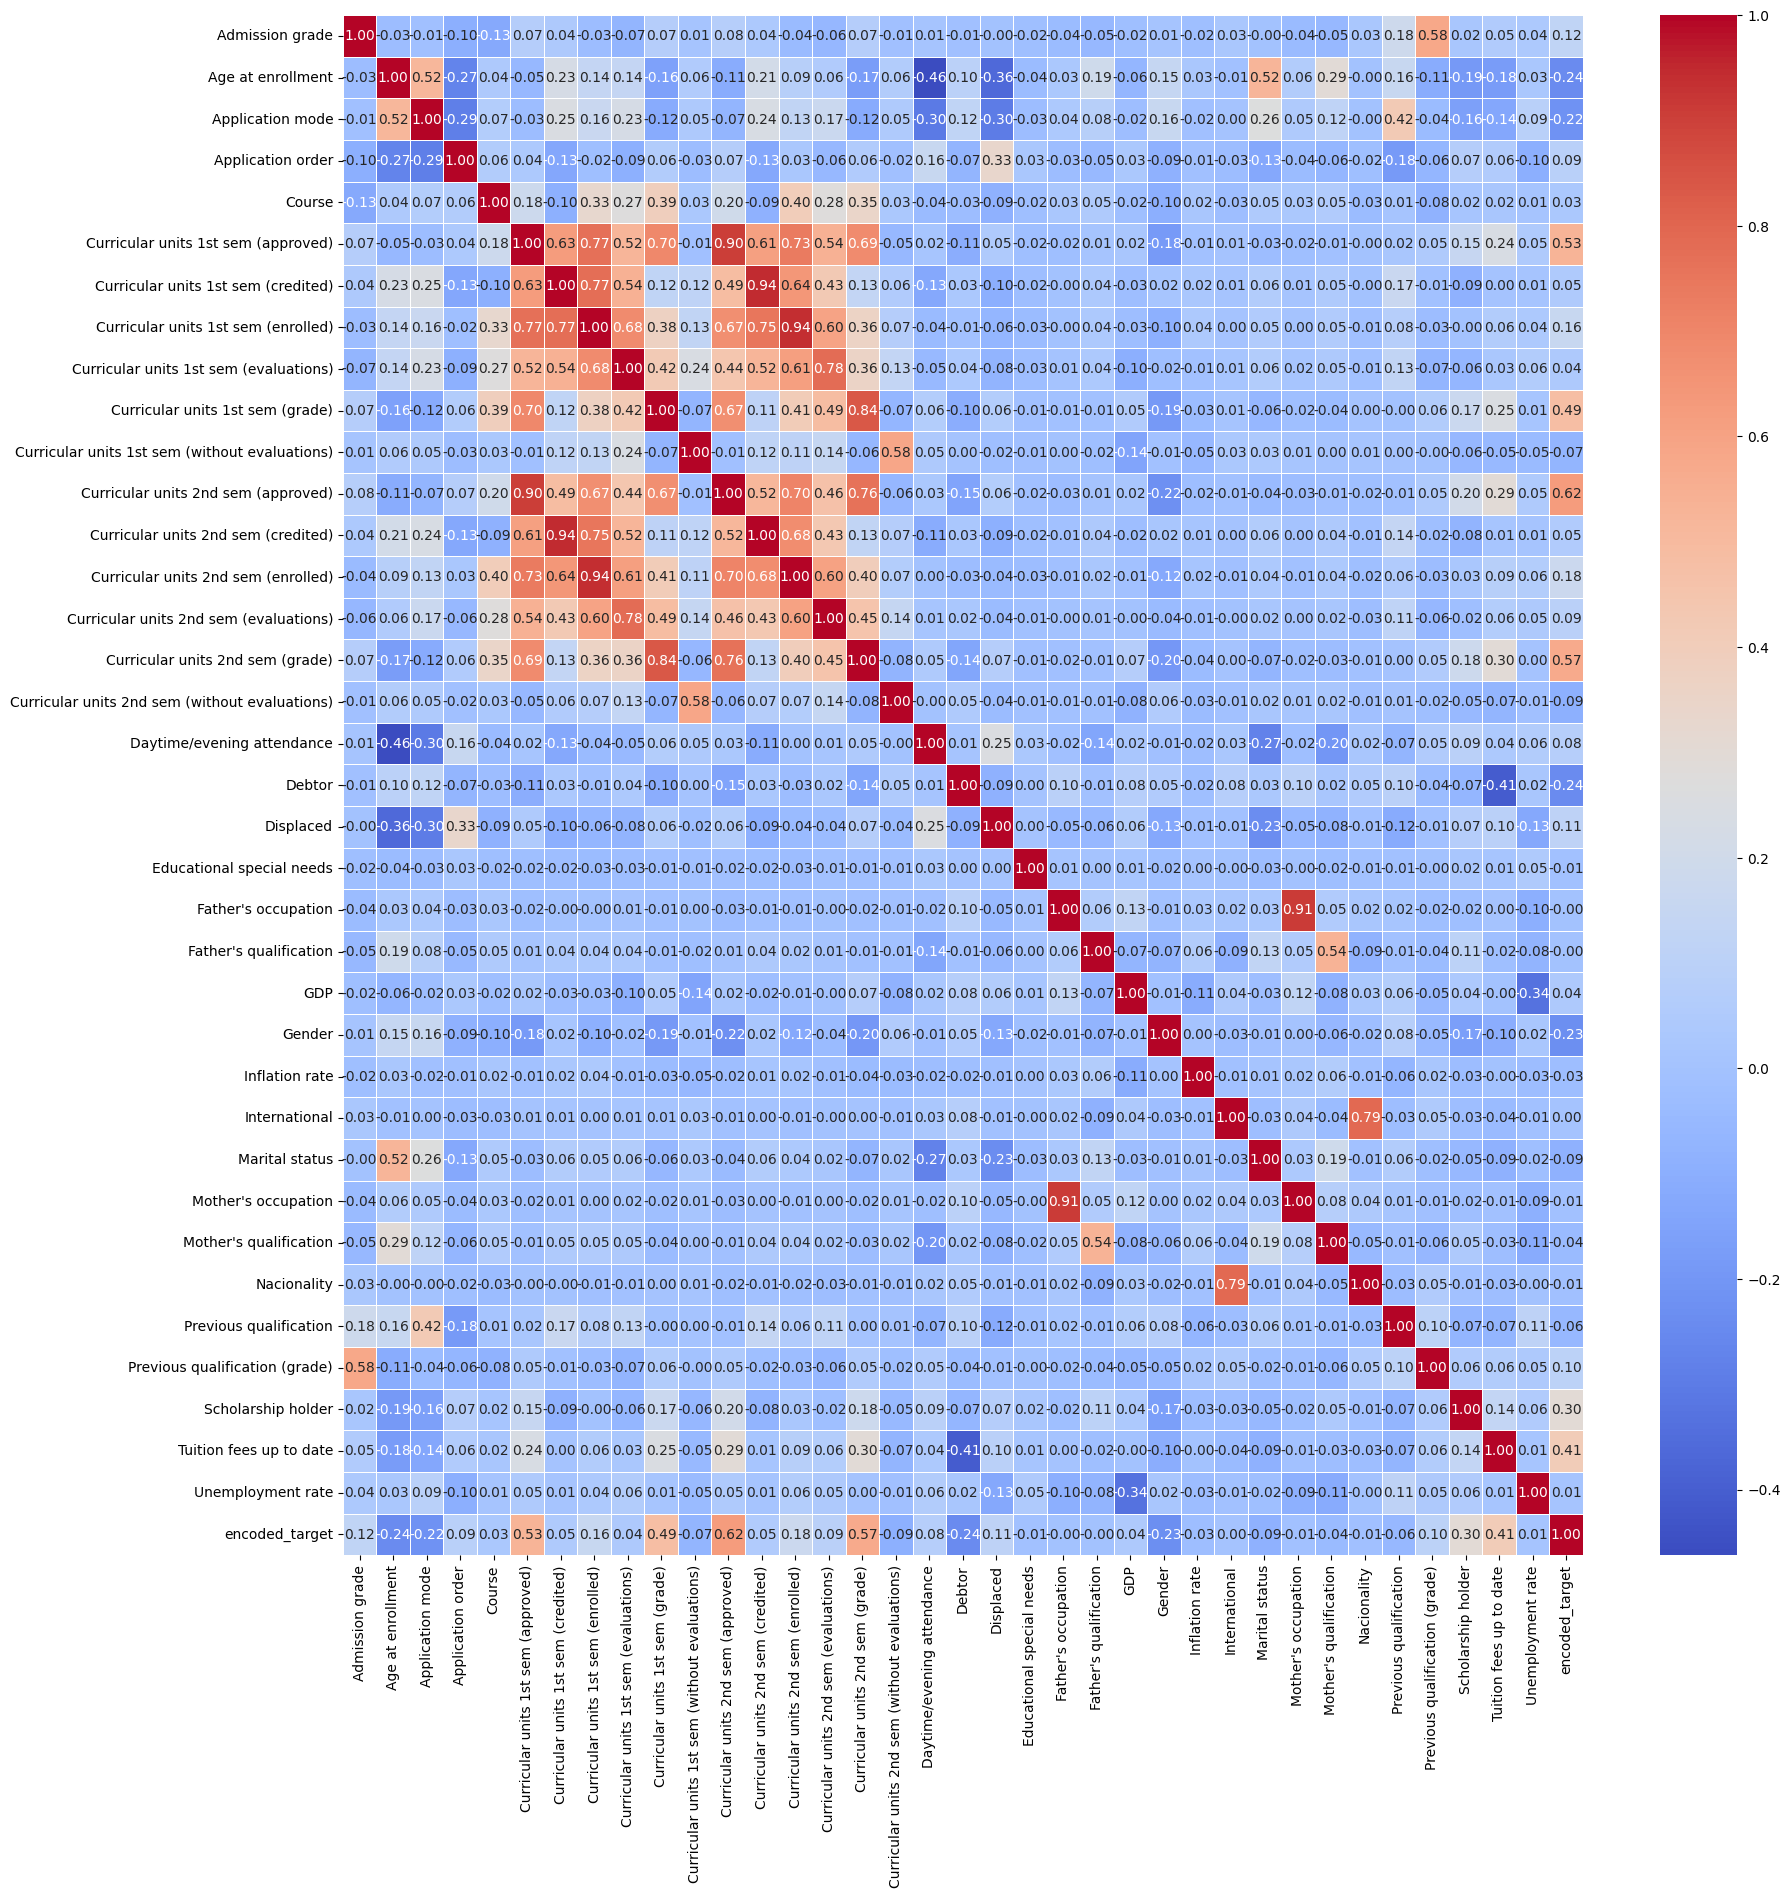

In [326]:
le = LabelEncoder()
df["encoded_target"] = le.fit_transform(df["Target"])
a = le.transform(df["Target"].unique())
print(a)
print(le.inverse_transform(a))

df.sort_index(axis=1,inplace=True)
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [327]:
# df["Marital status"] = df["Marital status"].map(marital_status_dict)
# df["Application mode"] = df["Application mode"].map(application_mode_dict)
# df["Course"] = df["Course"].map(course)
# df["Daytime/evening attendance"] = df["Daytime/evening attendance"].map(attendance_dict)
# df["Previous qualification"] = df["Previous qualification"].map(previous_qualification_dict)
# df["Nacionality"] = df["Nacionality"].map(nationality_dict)
# df["Mother's qualification"] = df["Mother's qualification"].map(mother_qualification_dict)
# df["Father's qualification"] = df["Father's qualification"].map(father_qualification_dict)
# df["Mother's occupation"] = df["Mother's occupation"].map(mother_occupation_dict)
# df["Father's occupation"] = df["Father's occupation"].map(father_occupation_dict)
# df["Displaced"] = df["Displaced"].map({0:"No",1:"Yes"})
# df["Educational special needs"] = df["Educational special needs"].map({0:"No",1:"Yes"})
# df["Debtor"]=df["Debtor"].map({0:"No",1:"Yes"})
# df["Tuition fees up to date"]=df["Tuition fees up to date"].map({0:"No",1:"Yes"})
# df["Scholarship holder"]=df["Scholarship holder"].map({0:"No",1:"Yes"})
# df["International"]=df["International"].map({0:"No",1:"Yes"})
# # 1 – male 0 – female
# df["Gender"]=df["Gender"].map({0:"Female",1:"Male"})

In [328]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Admission grade                                 4424 non-null   float64
 1   Age at enrollment                               4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Curricular units 1st sem (approved)             4424 non-null   int64  
 6   Curricular units 1st sem (credited)             4424 non-null   int64  
 7   Curricular units 1st sem (enrolled)             4424 non-null   int64  
 8   Curricular units 1st sem (evaluations)          4424 non-null   int64  
 9   Curricular units 1st sem (grade)         

None

In [329]:
display(df.head())

,Admission grade,Age at enrollment,Application mode,Application order,Course,Curricular units 1st sem (approved),Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),...,Mother's occupation,Mother's qualification,Nacionality,Previous qualification,Previous qualification (grade),Scholarship holder,Target,Tuition fees up to date,Unemployment rate,encoded_target
0,127.3,20,17,5,171,0,0,0,0,0.000000,...,5,19,1,1,122.0,0,Dropout,1,10.8,0
1,142.5,19,15,1,9254,6,0,6,6,14.000000,...,3,1,1,1,160.0,0,Graduate,0,13.9,2
2,124.8,19,1,5,9070,0,0,6,0,0.000000,...,9,37,1,1,122.0,0,Dropout,0,10.8,0
3,119.6,20,17,2,9773,6,0,6,8,13.428571,...,5,38,1,1,122.0,0,Graduate,1,9.4,2
4,141.5,45,39,1,8014,5,0,6,9,12.333333,...,9,37,1,1,100.0,0,Graduate,1,13.9,2


In [330]:
for i in df.columns:
    print(i)

Admission grade
Age at enrollment
Application mode
Application order
Course
Curricular units 1st sem (approved)
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Daytime/evening attendance
Debtor
Displaced
Educational special needs
Father's occupation
Father's qualification
GDP
Gender
Inflation rate
International
Marital status
Mother's occupation
Mother's qualification
Nacionality
Previous qualification
Previous qualification (grade)
Scholarship holder
Target
Tuition fees up to date
Unemployment rate
encoded_target


In [331]:
def make_plot(column:str, xticks_:bool=True):
    i = column
    unique_values = df[i].unique()
    min_val = unique_values.min()
    max_val = unique_values.max()
    # print(i)
    plt.figure(figsize=(10, 6))
    plt.grid()
    ax = sns.histplot(
        data=df,
        x=i,
        kde=False,
        # multiple="dodge",
        shrink=0.5,
        hue="Target",
        bins=len(unique_values),
        discrete=True
        )
    if xticks_:
        ticks = np.arange(min_val, max_val + 1)
        plt.xticks(ticks)
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 6))
    plt.grid()

    ax = sns.histplot(
        data=df,
        x=i,
        kde=False,
        multiple="dodge",
        shrink=0.5,
        bins=len(unique_values),
        discrete=True
    )
    if xticks_:
        ticks = np.arange(min_val, max_val + 1)
        plt.xticks(ticks)
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show()


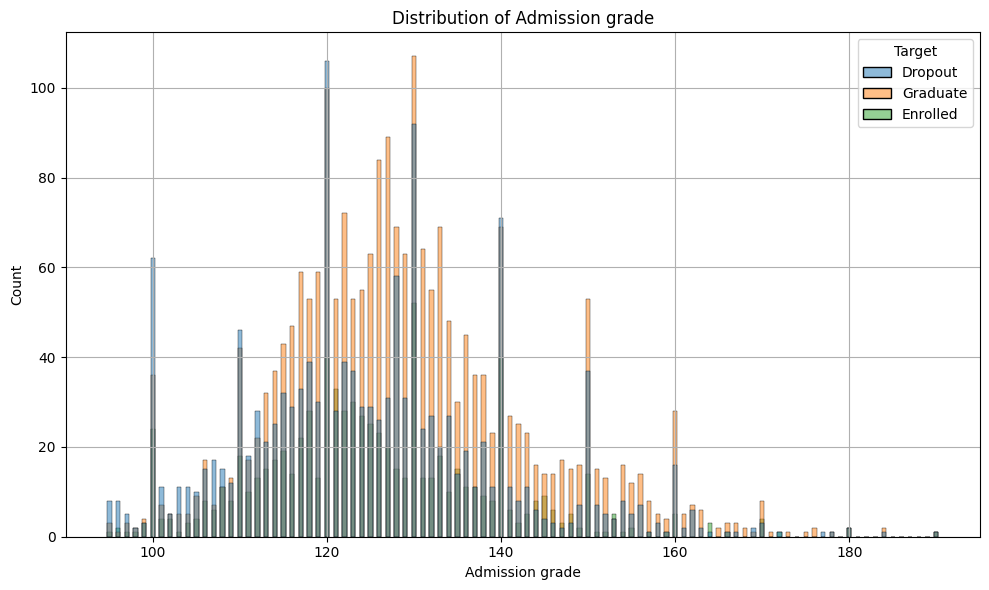

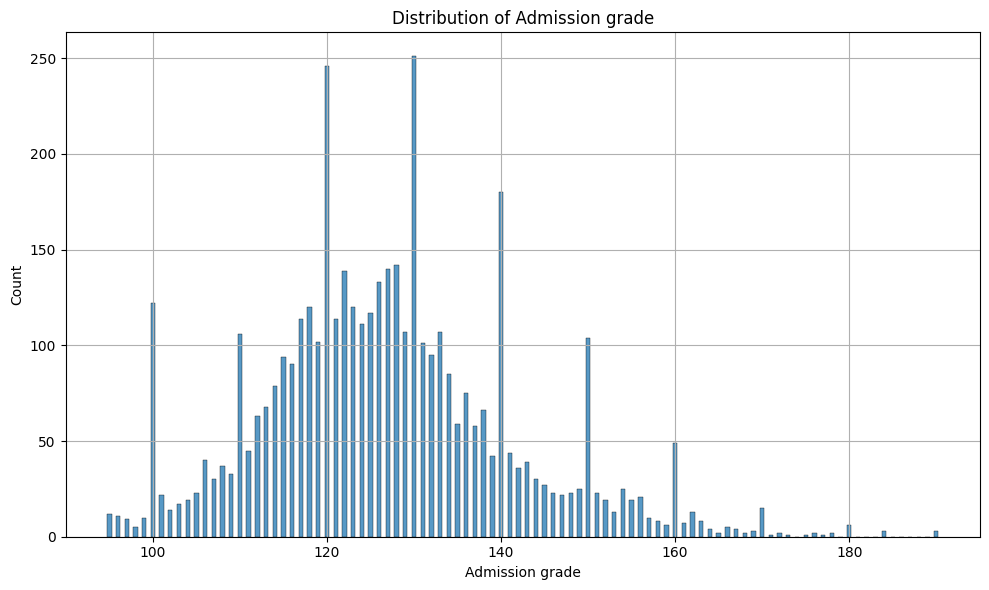

In [332]:
make_plot(column="Admission grade", xticks_=False)

## Admission grade

Pode-se notar que a maior parte da frequência estão entre 115 a 135 de admission grade


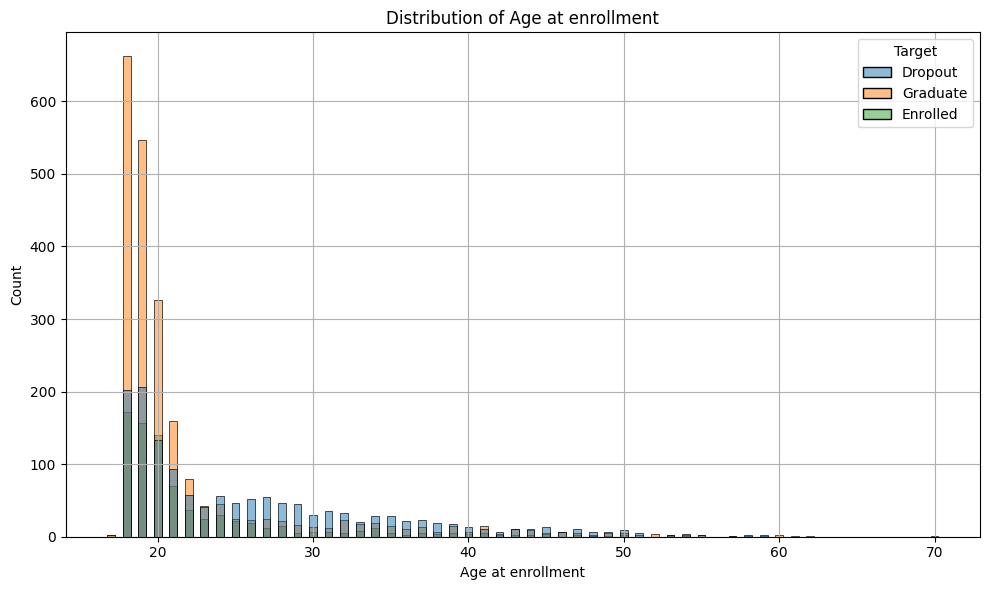

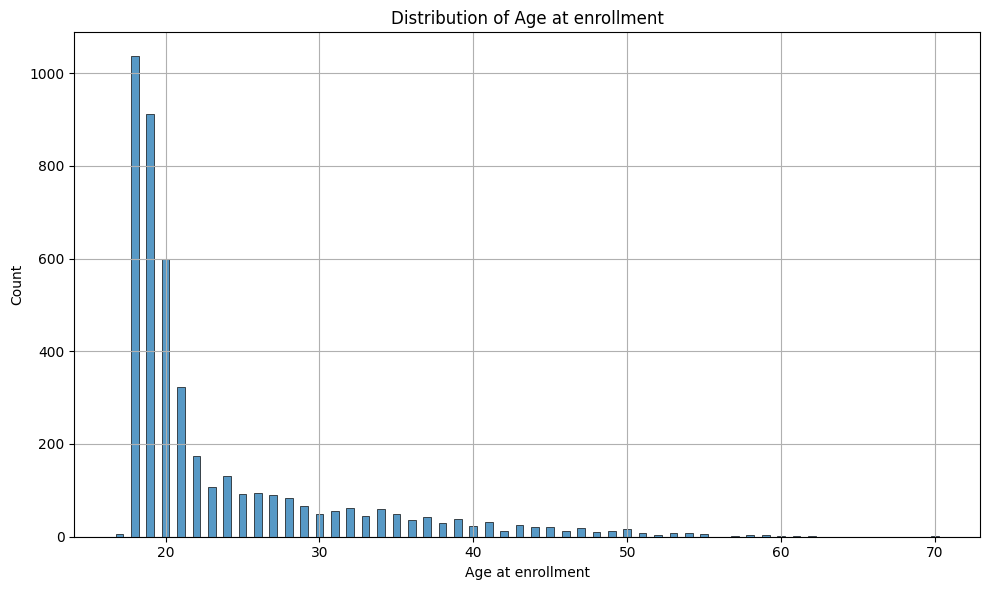

In [333]:
make_plot(column="Age at enrollment", xticks_=False)

## Age at enrollment

Nota-se que a maioria das admissões estão entre 17 e 20, também a maioria das admissões dentro dessa faixa etária conseguem se graduar, o restante da faixa etária, o que predomina é o dropout

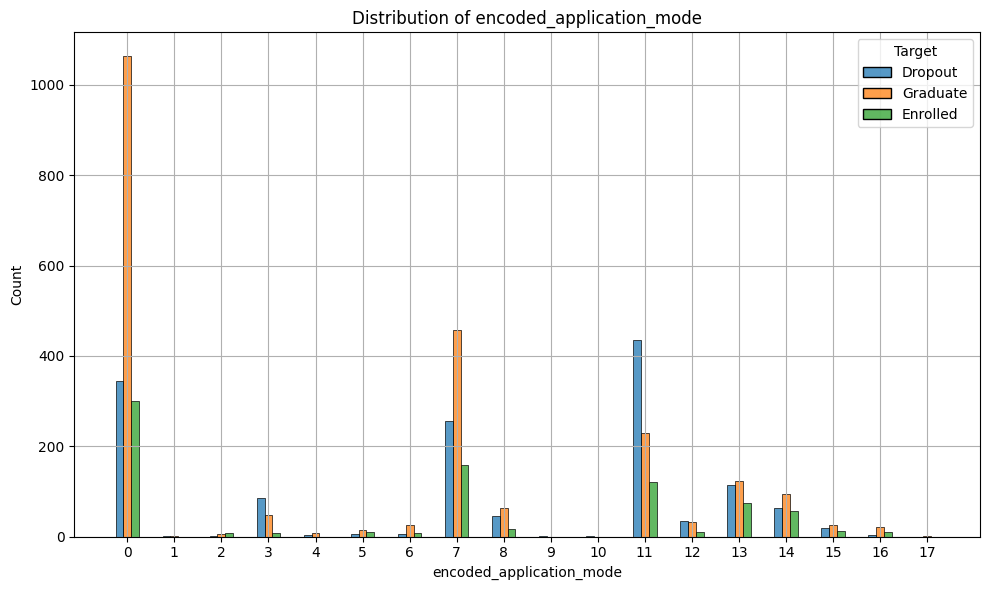

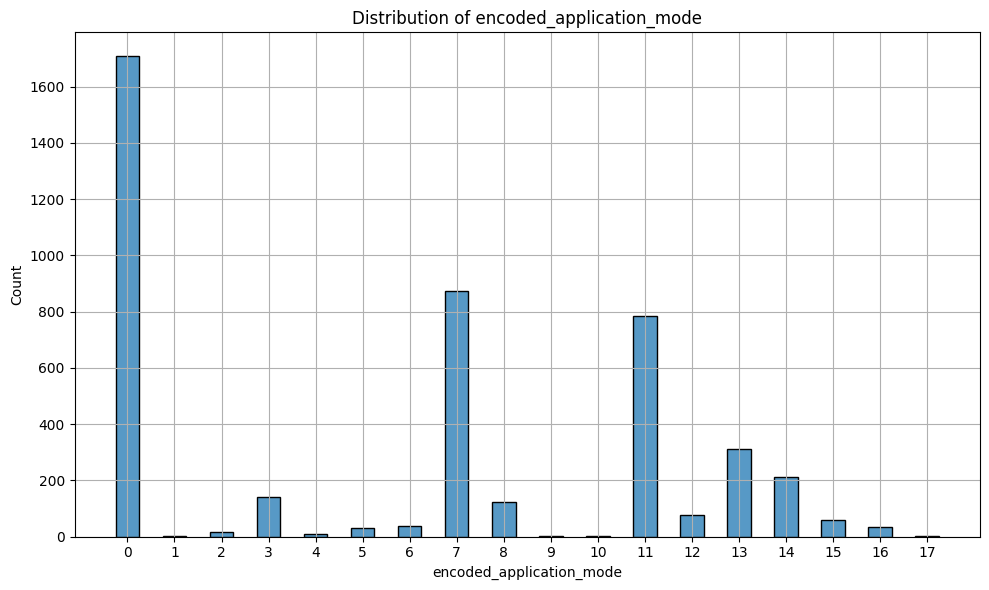

In [334]:
le = LabelEncoder()
i = 'encoded_application_mode'
df["encoded_application_mode"] = le.fit_transform(df["Application mode"])

a = le.transform(df["Application mode"].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {application_mode_dict[k]}")

unique_values = df[i].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=i,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {i}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=i,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {i}")
plt.tight_layout()
plt.show()

## Application mode
0: 1st phase - General Contingent

1: Ordinance No. 612/93

2: 1st phase - Special Contingent (Azores Island)

3: Holders of Other Higher Courses

4: Ordinance No. 854-B/99

5: International Student (Bachelor)

6: 1st phase - Special Contingent (Madeira Island)

7: 2nd phase - General Contingent

8: 3rd phase - General Contingent

9: Ordinance No. 533-A/99, item b2 (Different Plan)

10: Ordinance No. 533-A/99, item b3 (Other Institution)

11: Over 23 Years Old

12: Transfer

13: Change of Course

14: Technological Specialization Diploma Holders

15: Change of Institution/Course

16: Short Cycle Diploma Holders

17: Change of Institution/Course (International)

Nota-se que o dropout é superior na categoria 11, que são discentes maiores de 21 anos de idade.

A maioria ingressam pela categoria 0 e 7, que são respectivamente, 1st phase - General Contingent e 2nd phase - General Contingent

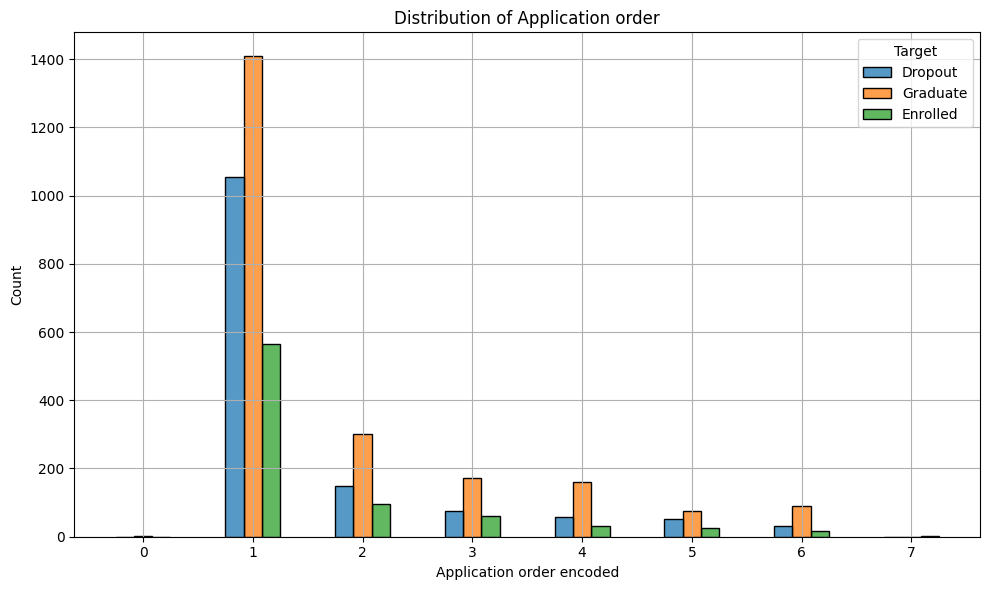

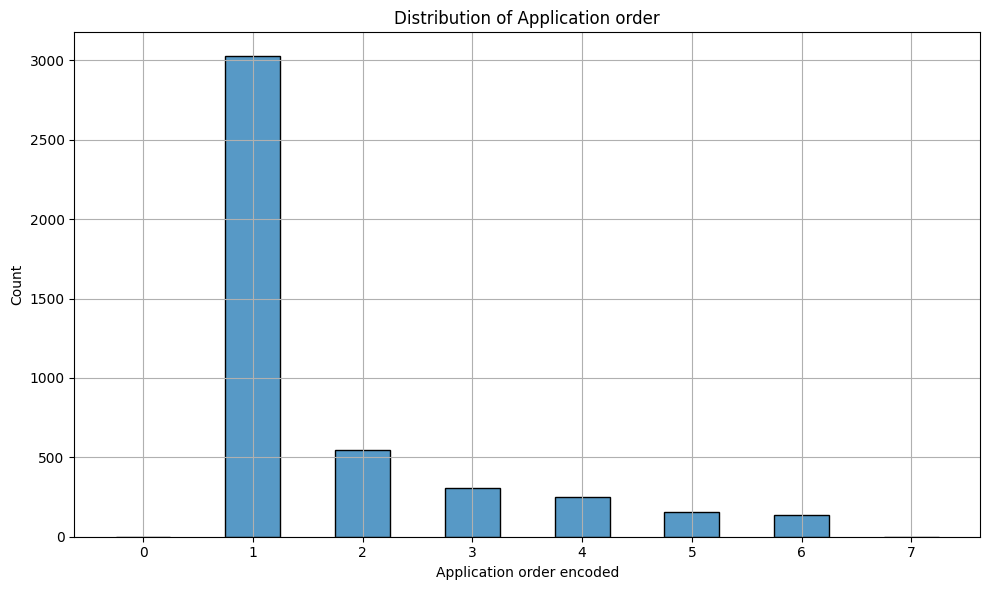

In [335]:
original = 'Application order'
encoded = 'Application order encoded'
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {application_mode_dict[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

## Application order

Ordem de aplicação, 0 é a primeira escolha, 9 é a ultima escolha.

Nota-se que as três categorias são proporcionais entre as escolhas, ou seja, mantem a mesma proporção em relação a quantidade total de admissões.

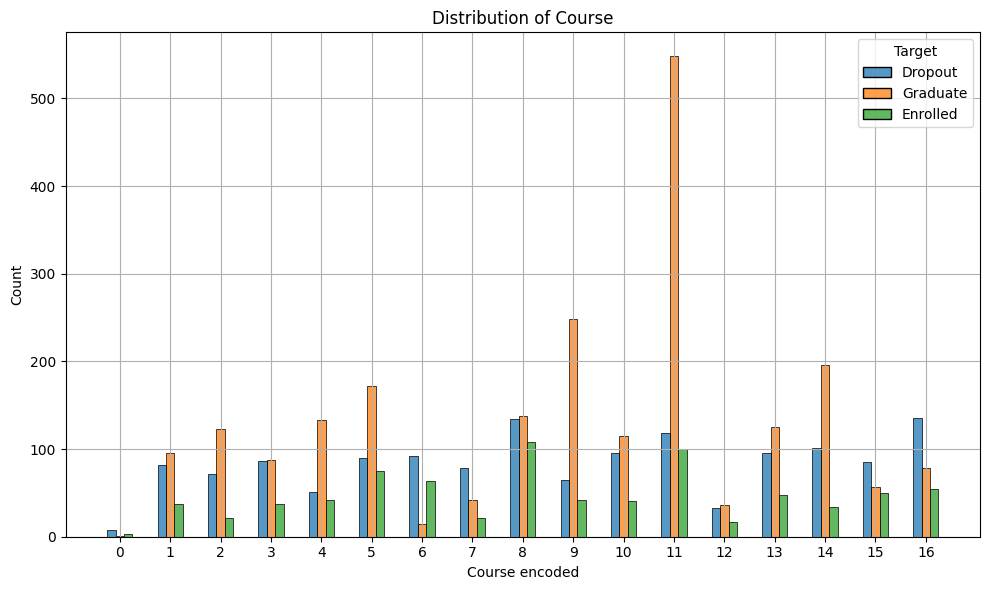

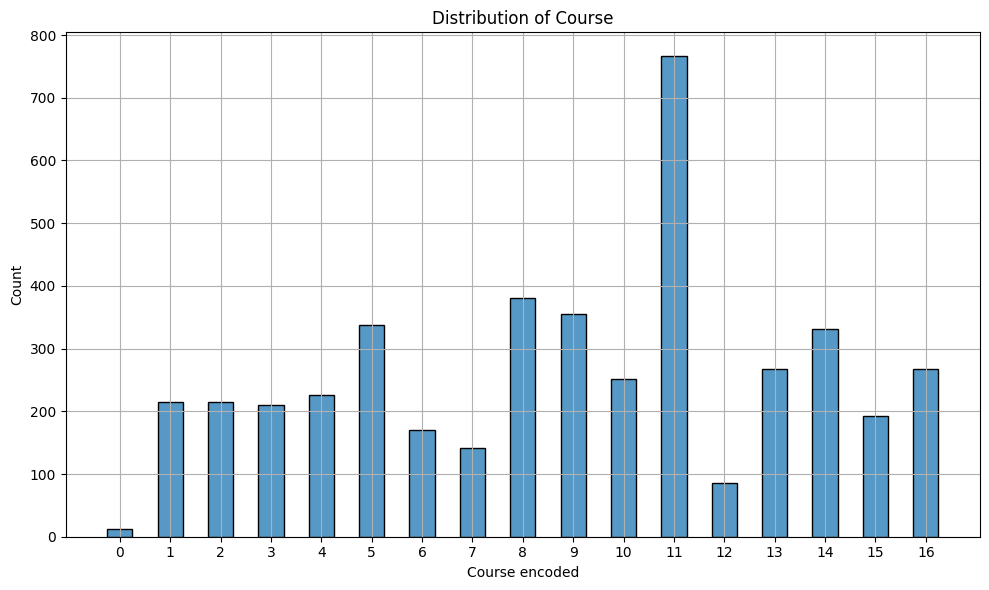

In [336]:
original = 'Course'
encoded = 'Course encoded'
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {course[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

## Course

0: Biofuel Production Technologies

1: Animation and Multimedia Design

2: Social Service (evening attendance)

3: Agronomy

4: Communication Design

5: Veterinary Nursing

6: Informatics Engineering

7: Equinculture

8: Management

9: Social Service

10: Tourism

11: Nursing

12: Oral Hygiene

13: Advertising and Marketing Management

14: Journalism and Communication

15: Basic Education

16: Management (evening attendance)

Nota-se que o 1, 8 e 16, que são respectivamente, Animation and Multimedia Design, Management e Management (evening attendance) possuem altas taxas de dropout. O fato interessante é o Management aparecer duas vezes (pois são de periodos diferentes).

O curso 11 (Nursing), é o que possui mais admissões.

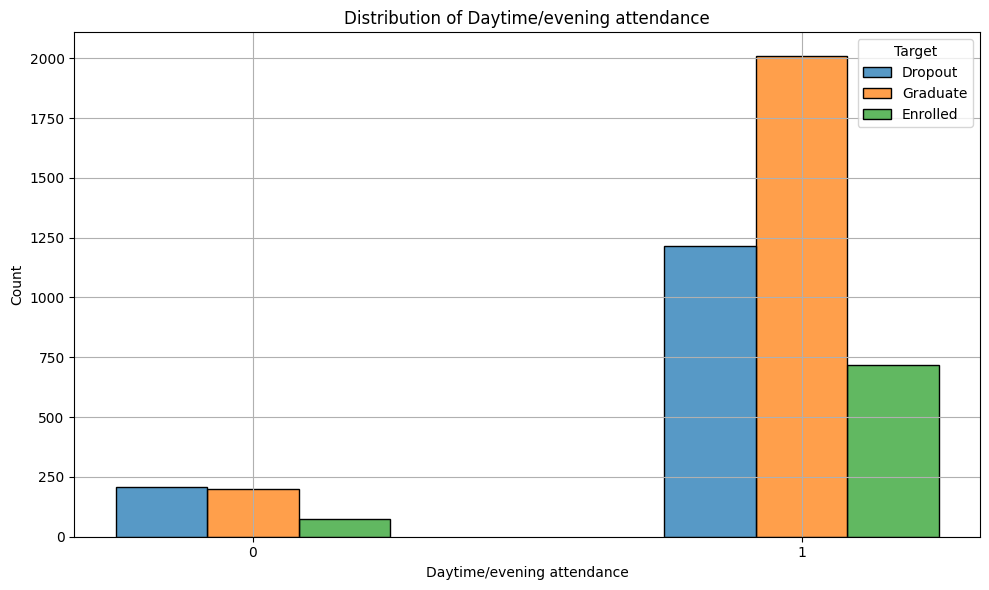

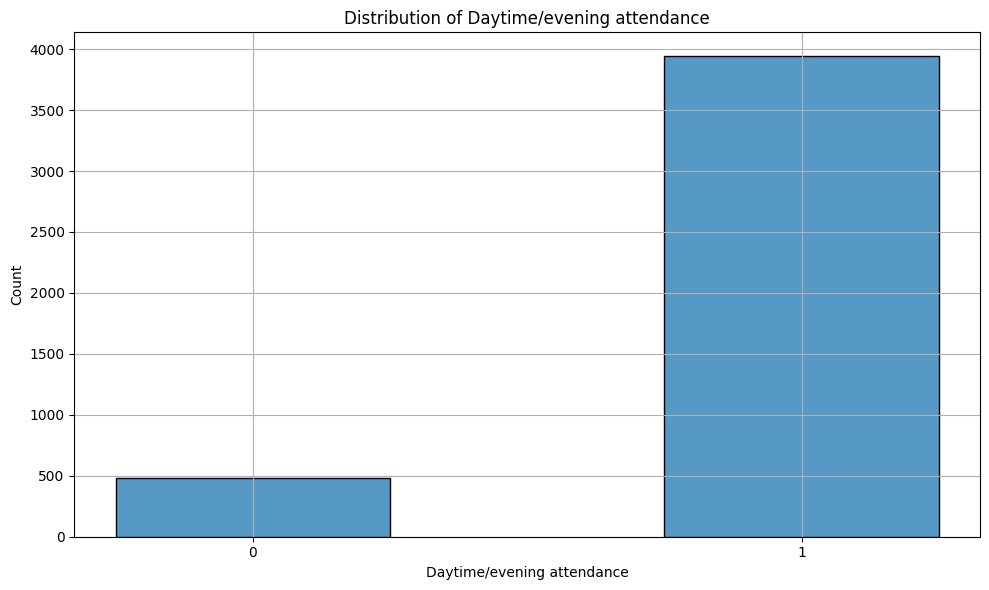

In [337]:
original = 'Daytime/evening attendance'
encoded = 'Daytime/evening attendance'
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {course[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

## Daytime/evening attendance

1 – daytime 

0 - evening

Nota-se que a taxa de dropout para o evening é quase que o mesmo para a taxa de graduate.

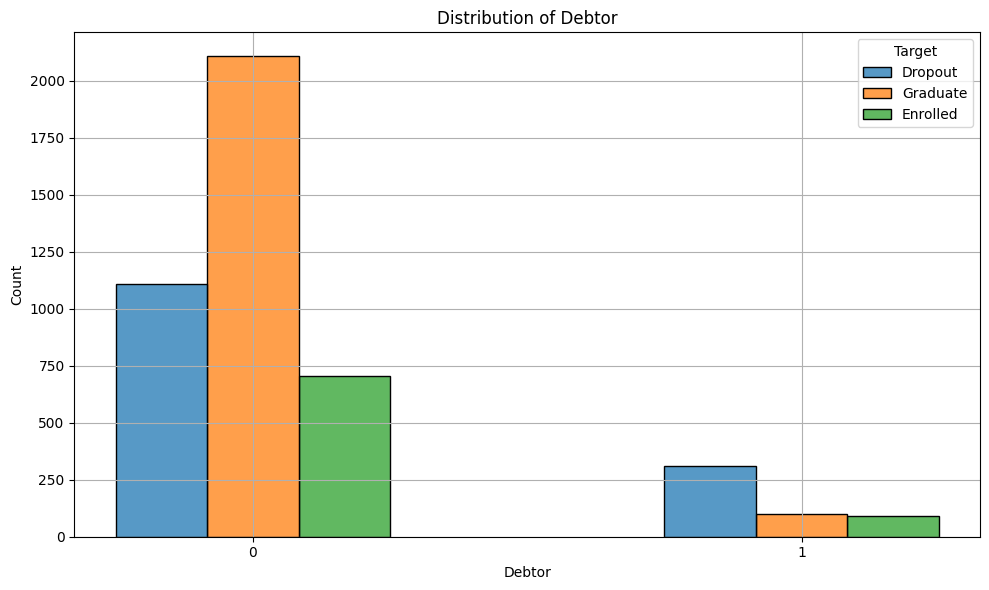

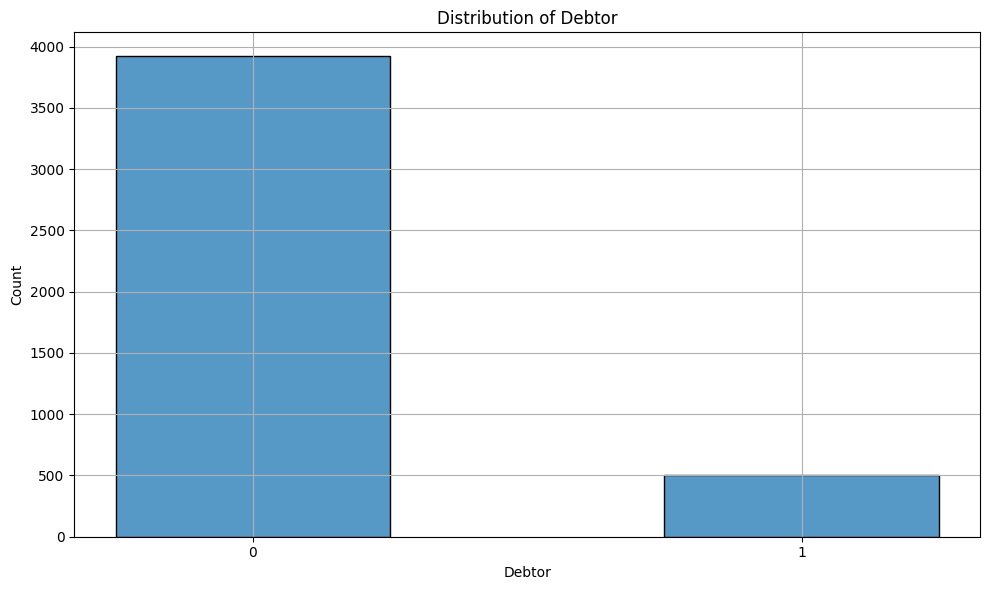

In [338]:
original = 'Debtor'
encoded = 'Debtor'
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {course[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


1 – yes

0 – no

Nota-se que dropout predomina em frequecia para o debtors, porém para os não debtors, o dropout representa a metade dos graduados.

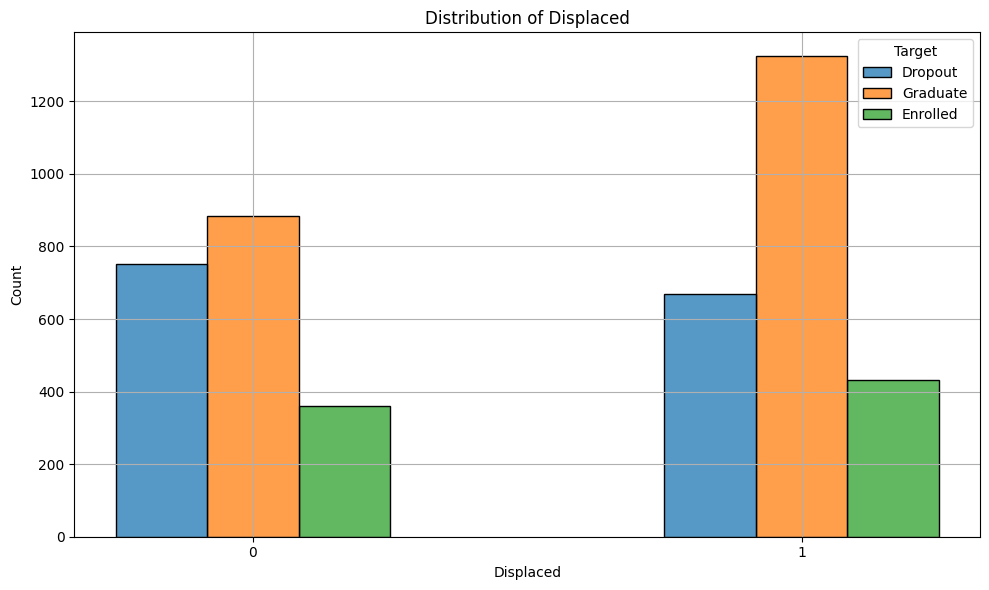

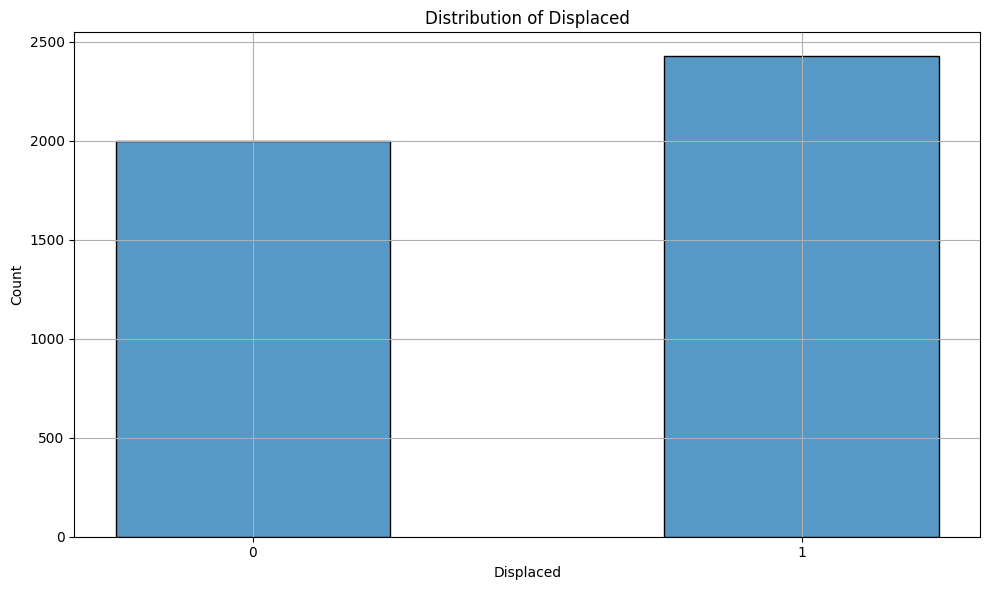

In [339]:
original = 'Displaced'
encoded = 'Displaced'
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {course[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

1 – yes 

0 – no

Nota-se o que predomina em não displaced é dropout, enquanto em displaced, o que predomina é o graduate, porém o dropout representa a metade do graduate.

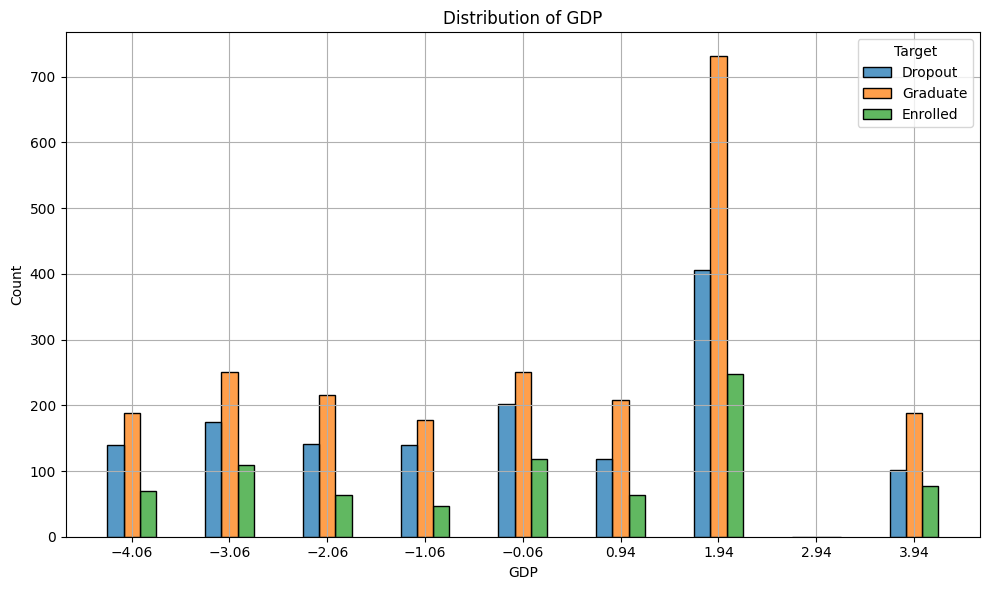

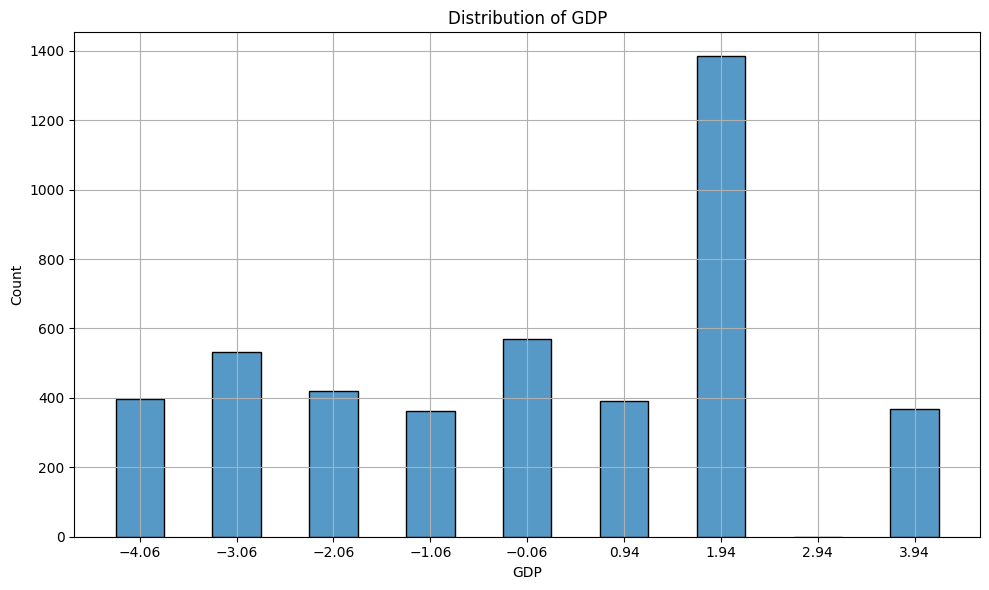

In [340]:
original = 'GDP'
encoded = 'GDP'
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {course[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

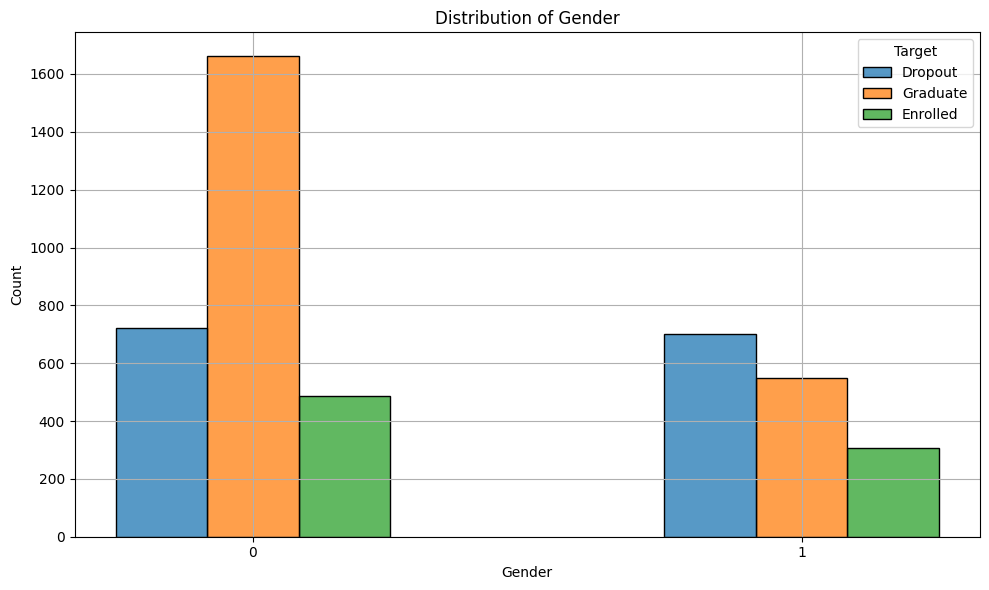

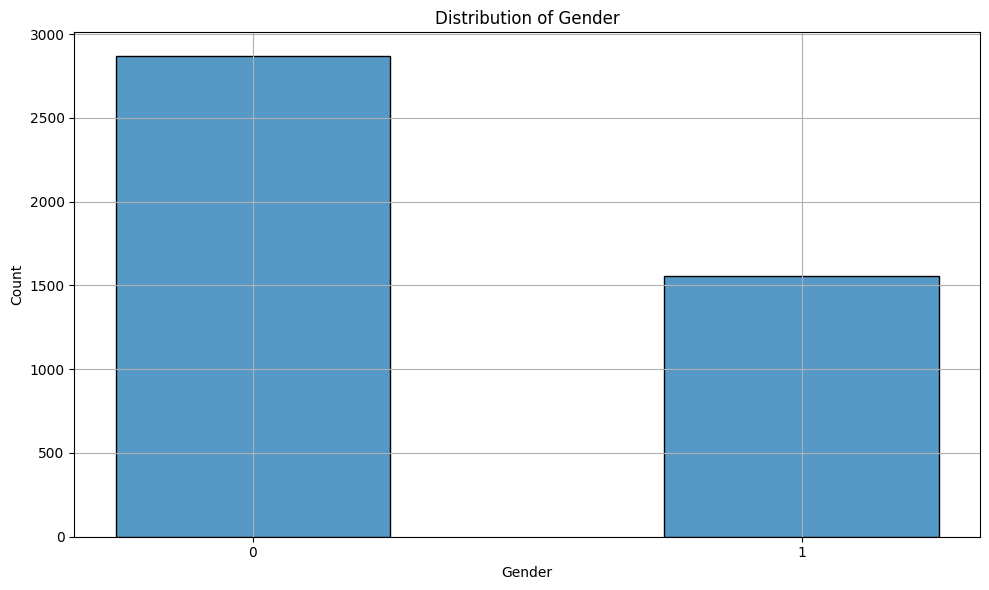

In [341]:
original = 'Gender'
encoded = 'Gender'
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {course[k]}")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

0 – female

1 – male 

Nota-se que em males, o que predomina é dropout.

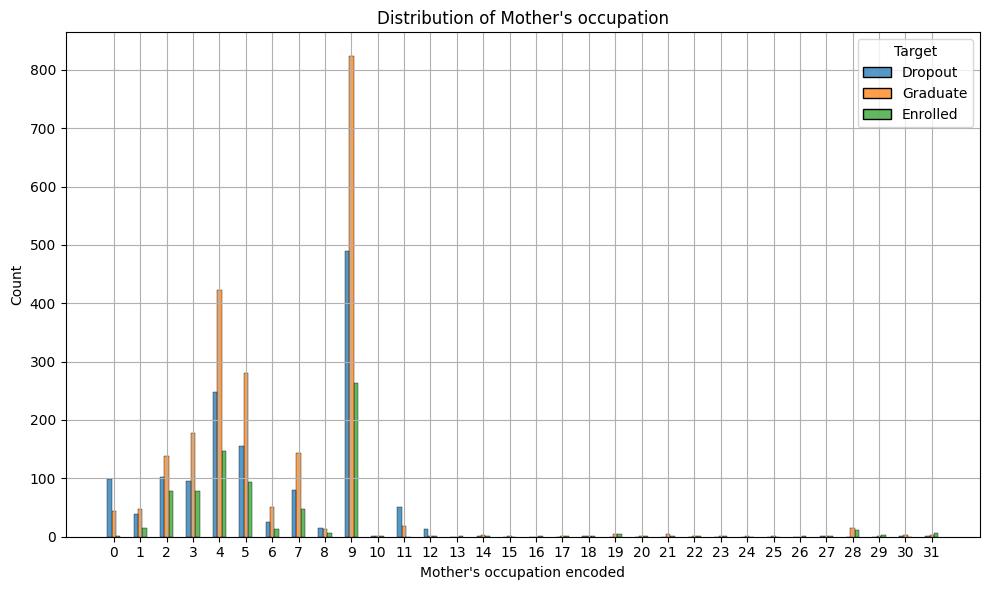

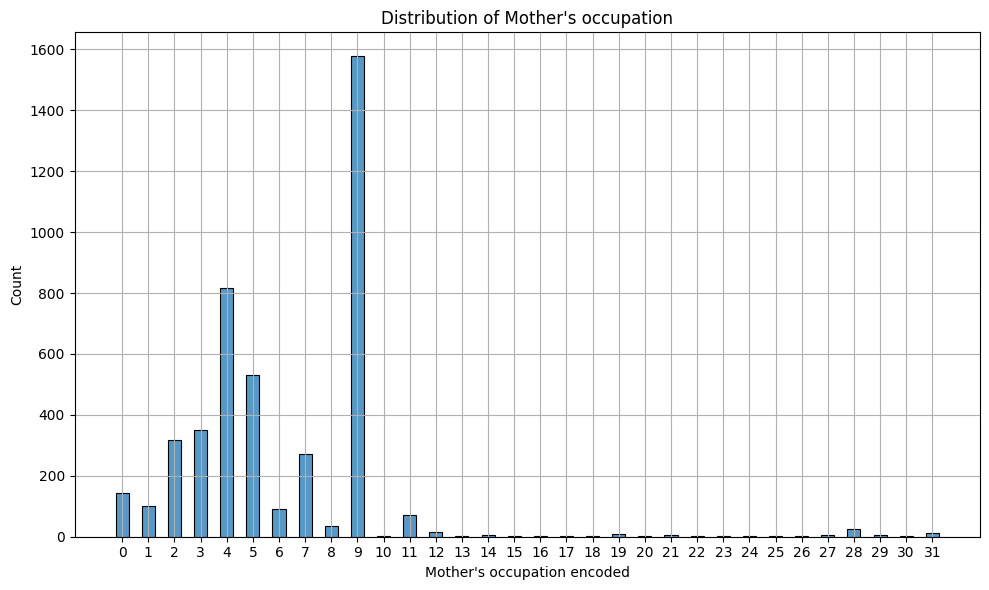

In [342]:
original = "Mother's occupation"
encoded = "Mother's occupation encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {mother_occupation_dict[k]}\n")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

## Mother's occupation

0: Student

1: Legislative & Executive Representatives, Directors, Managers

2: Intellectual & Scientific Professionals

3: Intermediate Level Technicians & Professions

4: Administrative Staff

5: Personal Services, Security, Safety Workers & Sellers

6: Farmers & Skilled Workers in Agriculture, Fisheries & Forestry

7: Skilled Industry, Construction & Craft Workers

8: Machine Operators & Assembly Workers

9: Unskilled Workers

10: Armed Forces Professions

11: Other Situation

12: Blank

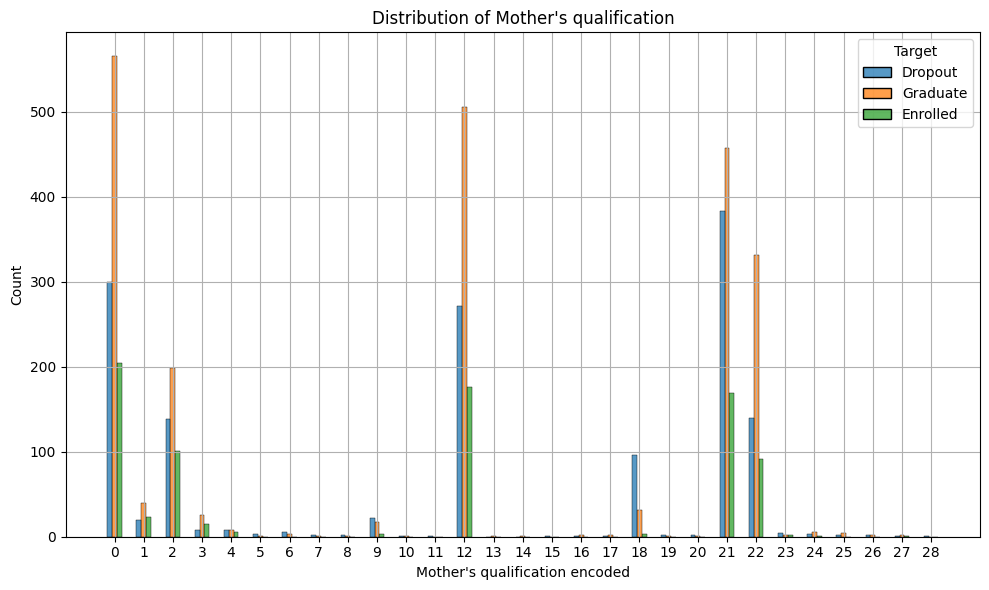

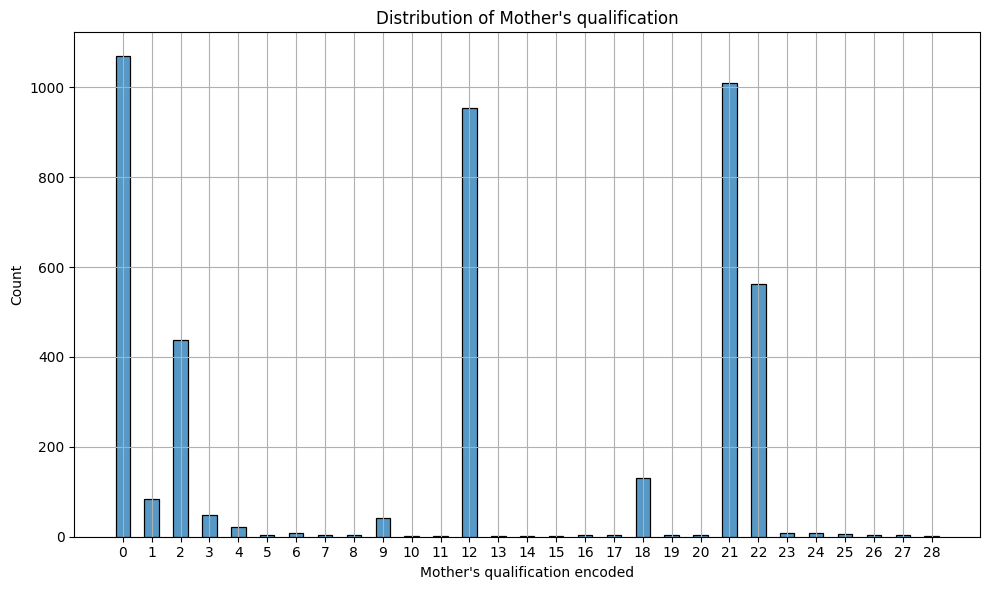

In [343]:
original = "Mother's qualification"
encoded = "Mother's qualification encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {mother_qualification_dict[k]}\n")
# print(a)
# print(le.inverse_transform(a))

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

## Mother's qualification

| 0: Secondary Education - 12th Year of Schooling or Eq.       |
|--------------------------------------------------------------|
| 1: Higher Education - Bachelor's Degree                      |
| 2: Higher Education - Degree                                 |
| 3: Higher Education - Master's                               |
| 4: Higher Education - Doctorate                              |
| 5: Frequency of Higher Education                             |
| 6: 12th Year of Schooling - Not Completed                    |
| 7: 11th Year of Schooling - Not Completed                    |
| 8: 7th Year (Old)                                            |
| 9: Other - 11th Year of Schooling                            |
| 10: 10th Year of Schooling                                   |
| 11: General Commerce Course                                  |
| 12: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. |
| 13: Technical-Professional Course                            |
| 14: 7th Year of Schooling                                    |
| 15: 2nd Cycle of the General High School Course              |
| 16: 9th Year of Schooling - Not Completed                    |
| 17: 8th Year of Schooling                                    |
| 18: Unknown                                                  |
| 19: Can't Read or Write                                      |
| 20: Can Read Without Having a 4th Year of Schooling          |
| 21: Basic Education 1st Cycle (4th/5th Year) or Equiv.       |
| 22: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   |
| 23: Technological Specialization Course                      |
| 24: Higher Education - Degree (1st Cycle)                    |
| 25: Specialized Higher Studies Course                        |
| 26: Professional Higher Technical Course                     |
| 27: Higher Education - Master (2nd Cycle)                    |
| 28: Higher Education - Doctorate (3rd Cycle)                 |



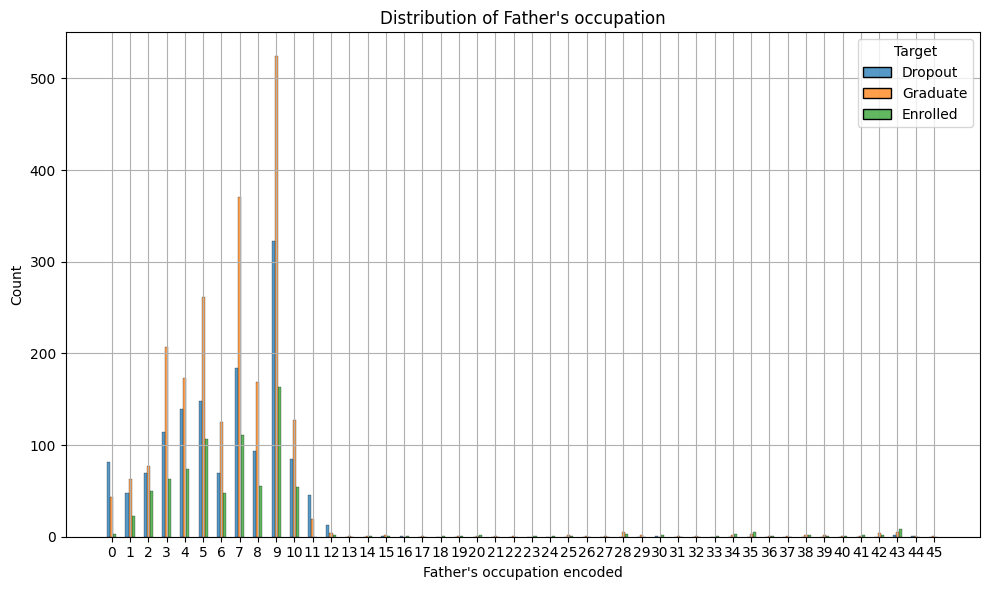

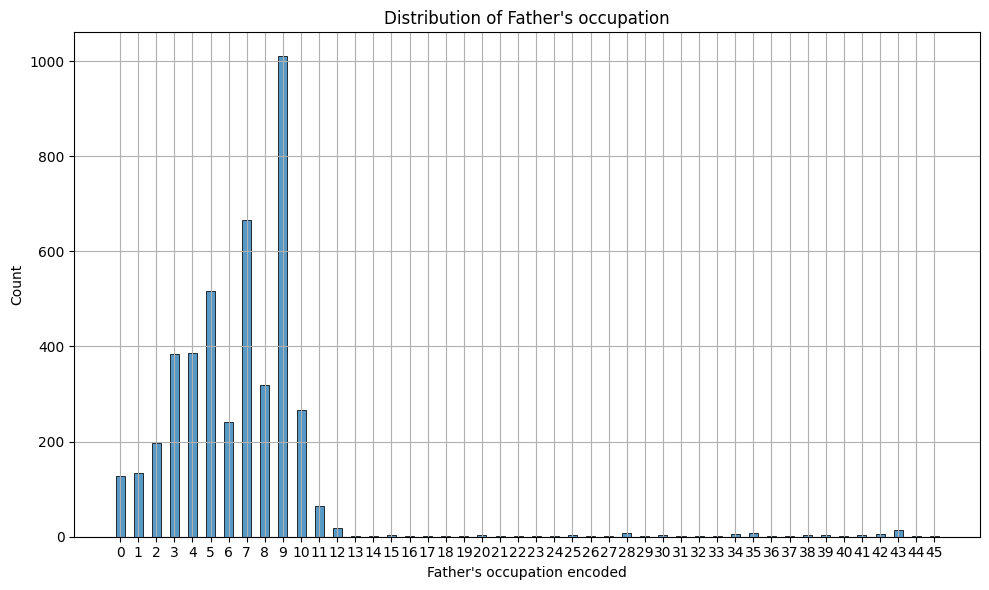

In [344]:
original = "Father's occupation"
encoded = "Father's occupation encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {father_occupation_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

Father's occupation
| 0: Student                                                        |
|-------------------------------------------------------------------|
| 1: Legislative & Executive Representatives, Directors, Managers   |
| 2: Intellectual & Scientific Professionals                        |
| 3: Intermediate Level Technicians & Professions                   |
| 4: Administrative Staff                                           |
| 5: Personal Services, Security, Safety Workers & Sellers          |
| 6: Farmers & Skilled Workers in Agriculture, Fisheries & Forestry |
| 7: Skilled Industry, Construction & Craft Workers                 |
| 8: Machine Operators & Assembly Workers                           |
| 9: Unskilled Workers                                              |
| 10: Armed Forces Professions                                      |
| 11: Other Situation                                               |
| 12: Blank                                                         |
| 13: Armed Forces Officers                                         |
| 14: Armed Forces Sergeants                                        |
| 15: Other Armed Forces Personnel                                  |
| 16: Administrative & Commercial Services Directors                |
| 17: Hotel, Catering, Trade & Service Directors                    |
| 18: Physical Sciences, Mathematics & Engineering Specialists      |
| 19: Health Professionals                                          |
| 20: Teachers                                                      |
| 21: Finance, Accounting & Administrative Specialists              |
| 22: Science & Engineering Technicians                             |
| 23: Health Technicians                                            |
| 24: Legal, Social, Cultural & Sports Technicians                  |
| 25: ICT Technicians                                               |
| 26: Office Workers & Secretaries                                  |
| 27: Accounting & Financial Services Staff                         |
| 28: Other Administrative Support Staff                            |
| 29: Personal Service Workers                                      |
| 30: Sellers                                                       |
| 31: Personal Care Workers                                         |
| 32: Protection & Security Services Personnel                      |
| 33: Market-Oriented Farmers & Skilled Agriculture Workers         |
| 34: Subsistence Farmers, Livestock Keepers, Fishermen & Hunters   |
| 35: Skilled Construction Workers                                  |
| 36: Metalworking & Metallurgy Workers                             |
| 37: Electrical & Electronics Workers                              |
| 38: Food, Clothing & Woodworking Industry Workers                 |
| 39: Fixed Plant & Machine Operators                               |
| 40: Assembly Workers                                              |
| 41: Vehicle Drivers & Mobile Equipment Operators                  |
| 42: Unskilled Agriculture & Fisheries Workers                     |
| 43: Unskilled Industry & Transport Workers                        |
| 44: Meal Preparation Assistants                                   |
| 45: Street Vendors & Service Providers                            |


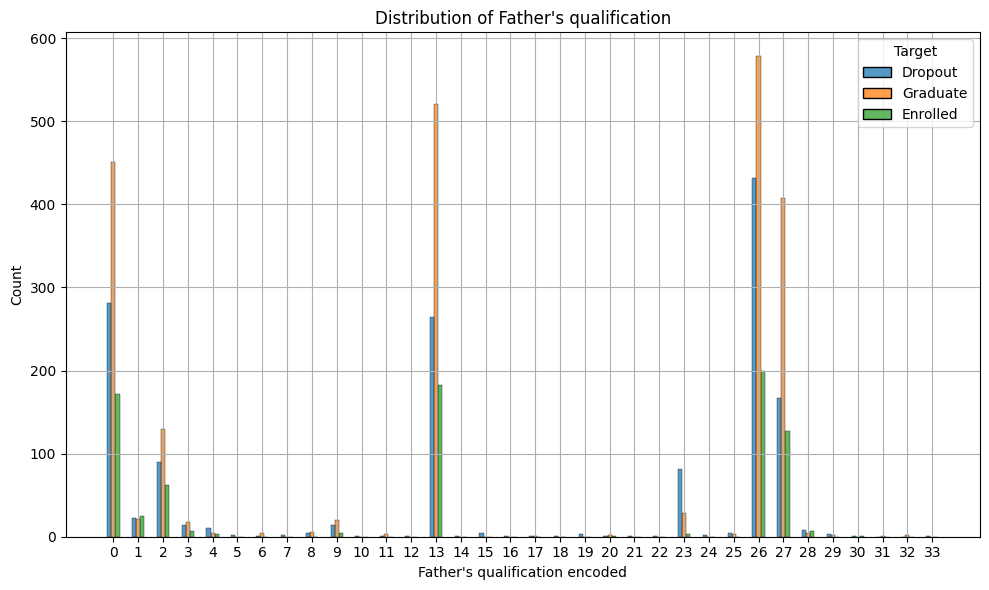

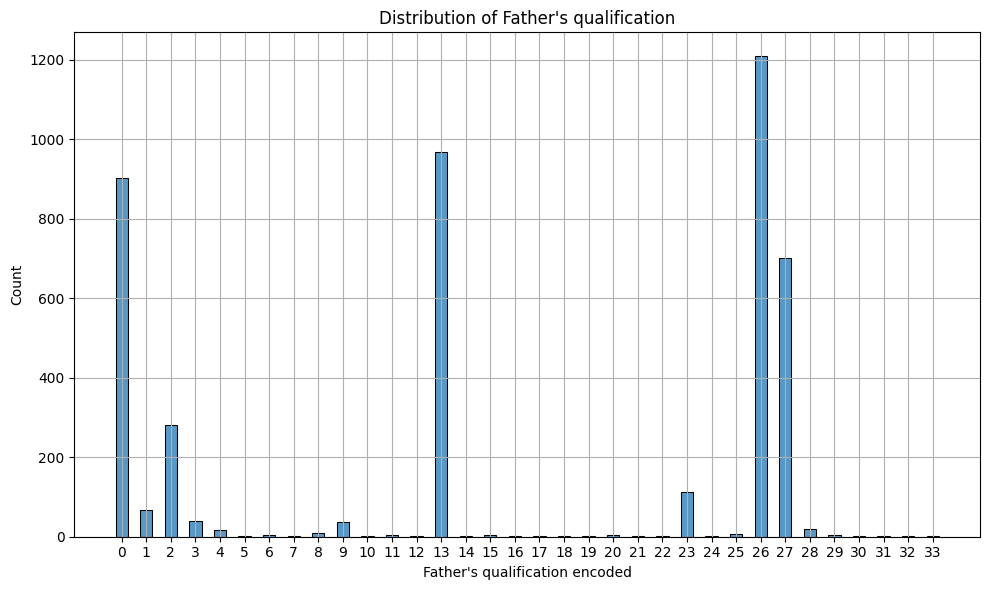

In [345]:
original = "Father's qualification"
encoded = "Father's qualification encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {father_qualification_dict[int(k)]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

Father's qualification

1: Higher Education - Bachelor's Degree

2: Higher Education - Degree

3: Higher Education - Master's

4: Higher Education - Doctorate

5: Frequency of Higher Education

6: 12th Year of Schooling - Not Completed

7: 11th Year of Schooling - Not Completed

8: 7th Year (Old)

9: Other - 11th Year of Schooling

10: 2nd year complementary high school course

11: 10th Year of Schooling

12: General commerce course

13: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.

14: Complementary High School Course

15: Technical-professional course

16: Complementary High School Course - not concluded

17: 7th year of schooling

18: 2nd cycle of the general high school course

19: 9th Year of Schooling - Not Completed

20: 8th year of schooling

21: General Course of Administration and Commerce

22: Supplementary Accounting and Administration

23: Unknown

24: Can't read or write

25: Can read without having a 4th year of schooling

26: Basic education 1st cycle (4th/5th year) or equiv.

27: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

28: Technological specialization course

29: Higher education - degree (1st cycle)

30: Specialized higher studies course

31: Professional higher technical course

32: Higher Education - Master (2nd cycle)

33: Higher Education - Doctorate (3rd cycle)



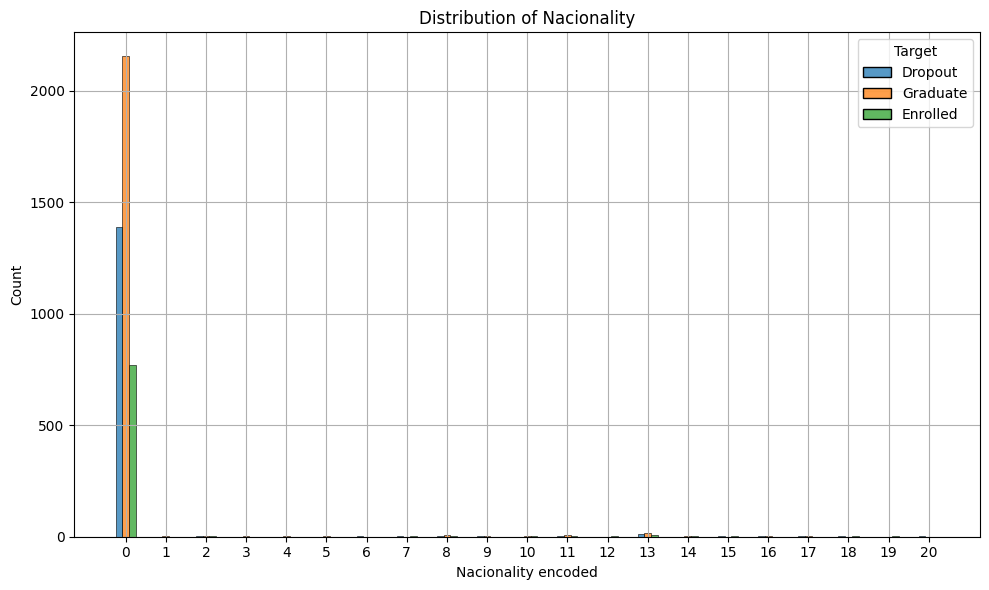

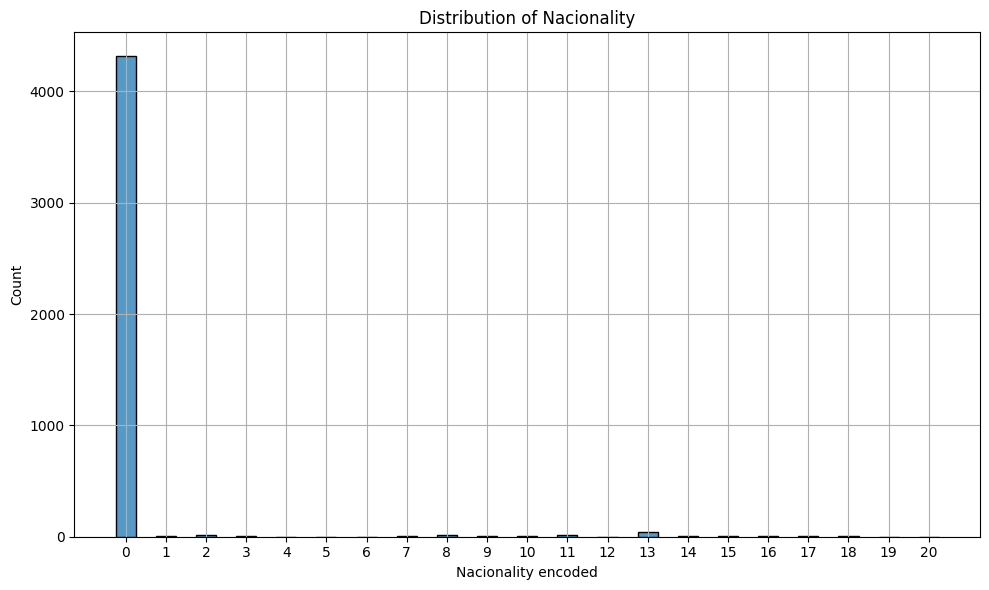

In [346]:
original = "Nacionality"
encoded = "Nacionality encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {nationality_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

0: Portuguese

1: German

2: Spanish

3: Italian

4: Dutch

5: English

6: Lithuanian

7: Angolan

8: Cape Verdean

9: Guinean

10: Mozambican

11: Santomean

12: Turkish

13: Brazilian

14: Romanian

15: Moldova (Republic of)

16: Mexican

17: Ukrainian

18: Russian

19: Cuban

20: Colombian


0: Portuguese

1: German

2: Spanish

3: Italian

4: Dutch

5: English

6: Lithuanian

7: Angolan

8: Cape Verdean

9: Guinean

10: Mozambican

11: Santomean

12: Turkish

13: Brazilian

14: Romanian

15: Moldova (Republic of)

16: Mexican

17: Ukrainian

18: Russian

19: Cuban

20: Colombian



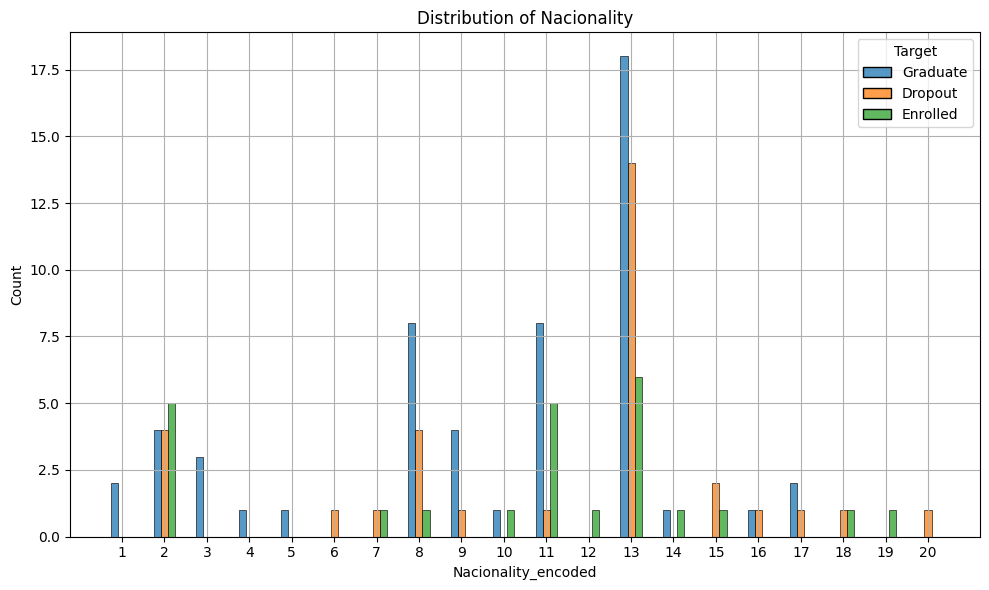

In [347]:
original = "Nacionality"
encoded = "Nacionality_encoded"
le = LabelEncoder()

le.fit(df[original].unique())


df[encoded] = np.nan 
df.loc[df[original] != 1, encoded] = le.transform(df.loc[df[original] != 1, original])


a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

for j, k in sorted_pairs:
    print(f"{j}: {nationality_dict.get(k, k)}\n")

unique_values = df[encoded].dropna().unique()
min_val = int(unique_values.min())
max_val = int(unique_values.max())
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
sns.histplot(
    data=df.dropna(subset=[encoded]),
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    hue="Target",
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


Excluindo os Portugueses, porque representava a maioria no histograma anterior

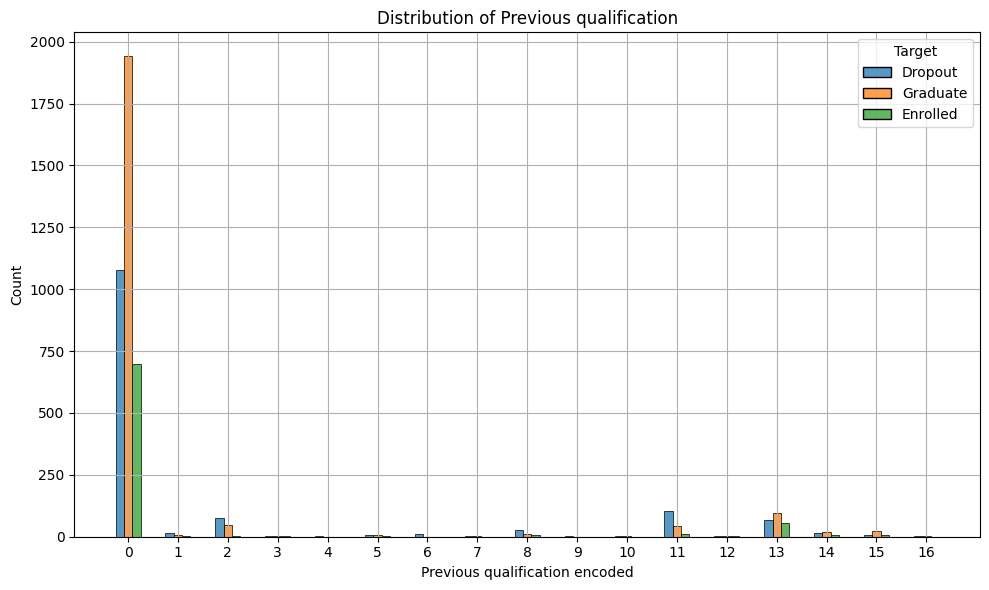

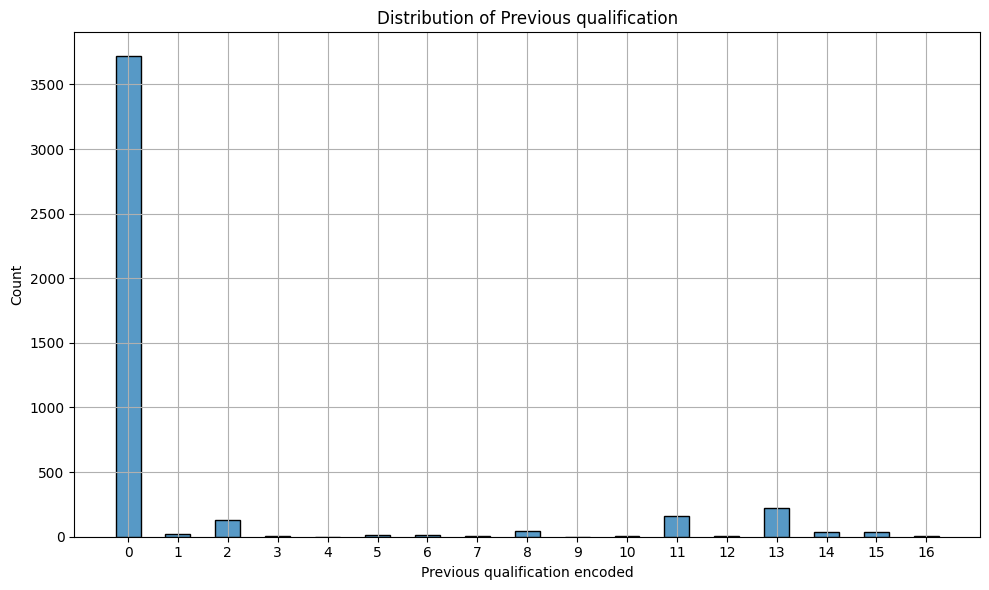

In [348]:
original = "Previous qualification"
encoded = "Previous qualification encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

a = le.transform(df[original].unique())
sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {previous_qualification_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


0: Secondary Education

1: Higher Education - Bachelor's Degree

2: Higher Education - Degree

3: Higher Education - Master's

4: Higher Education - Doctorate

5: Frequency of Higher Education

6: 12th Year of Schooling - Not Completed

7: 11th Year of Schooling - Not Completed

8: Other - 11th Year of Schooling

9: 10th Year of Schooling

10: 10th Year of Schooling - Not Completed

11: Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.

12: Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.

13: Technological Specialization Course

14: Higher Education - Degree (1st Cycle)

15: Professional Higher Technical Course

16: Higher Education - Master (2nd Cycle)



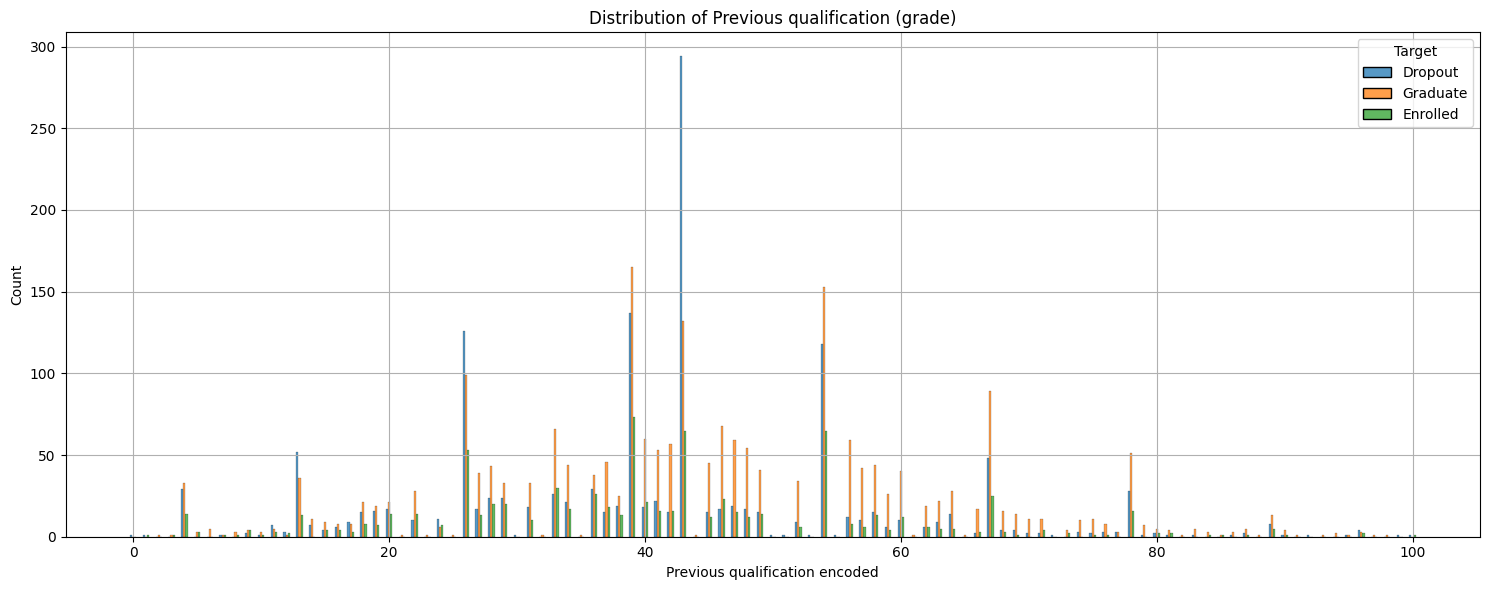

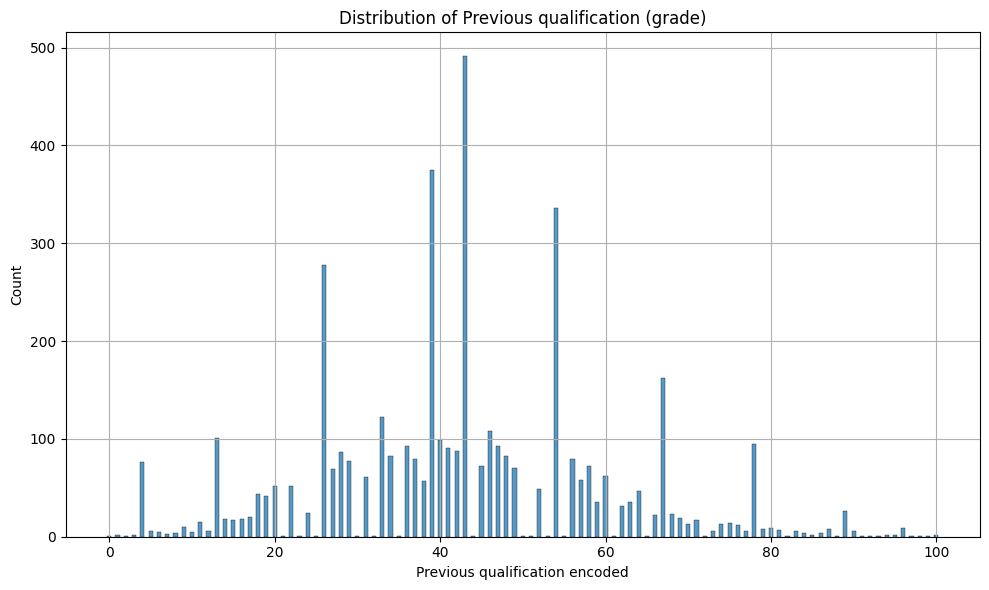

In [349]:
original = "Previous qualification (grade)"
encoded = "Previous qualification encoded"
le = LabelEncoder()
df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {previous_qualification_dict[k]}\n")

# unique_values = df[encoded].unique()
# min_val = unique_values.min()
# max_val = unique_values.max()
# ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(15, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
# plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
# plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


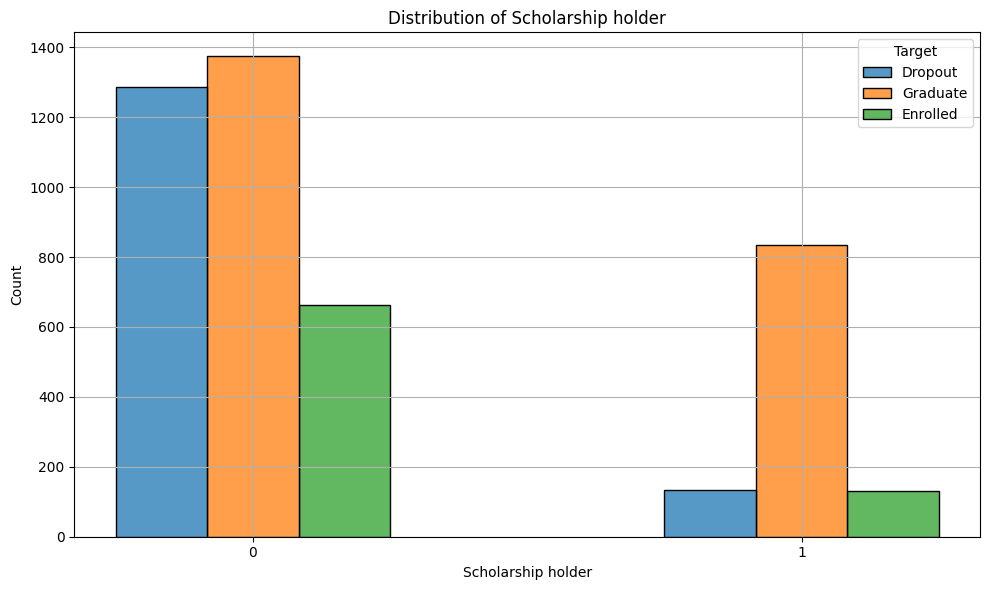

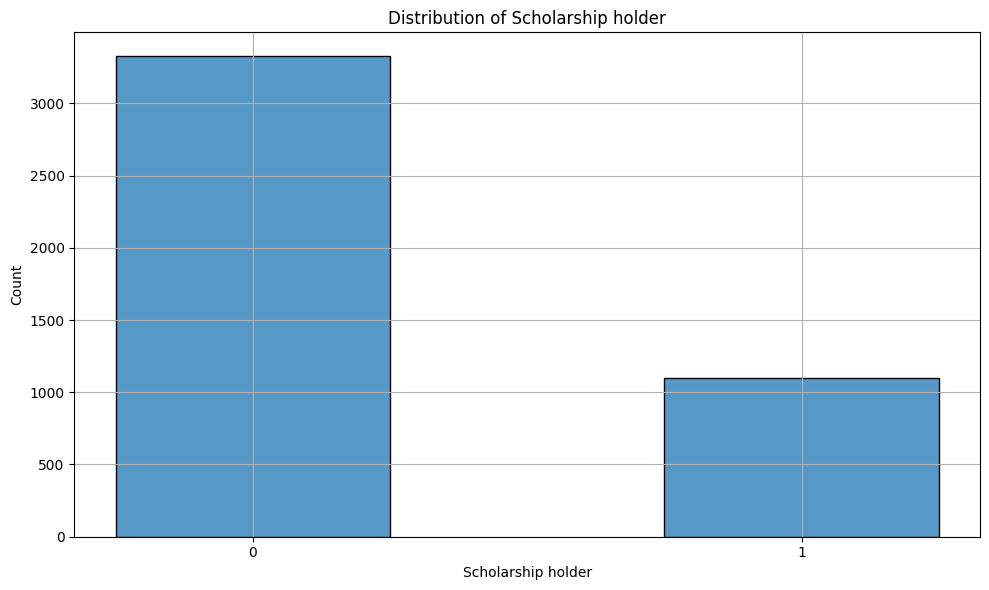

In [350]:
original = "Scholarship holder"
encoded = "Scholarship holder"
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
    # print(f"{j}: {previous_qualification_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


0 – no

1 – yes 



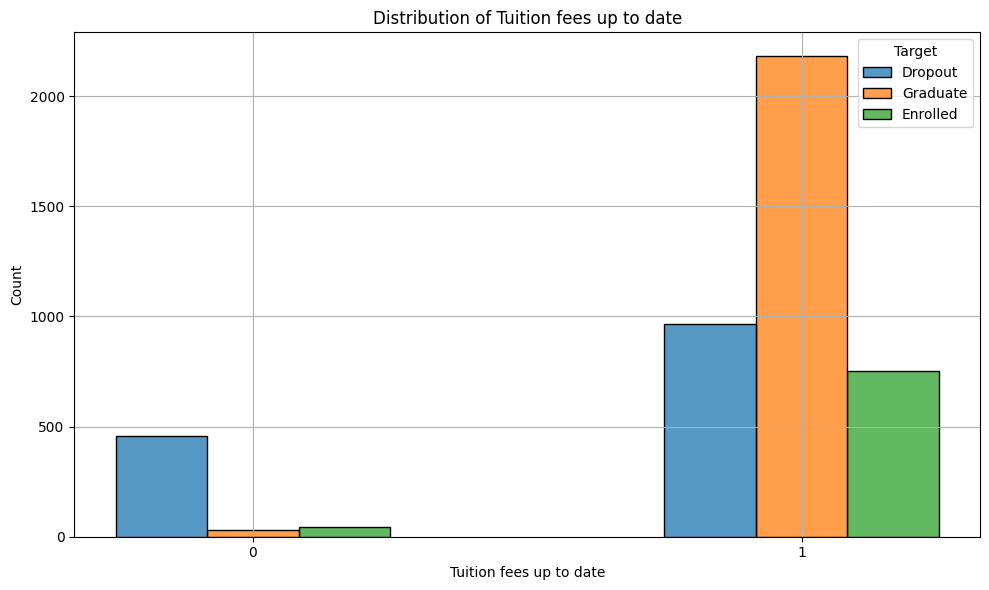

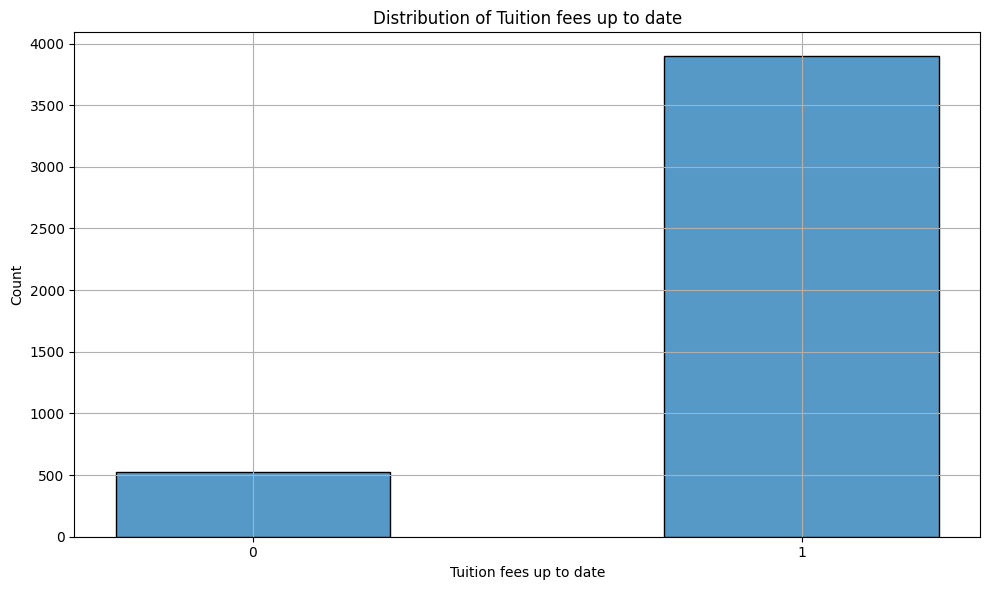

In [351]:
original = "Tuition fees up to date"
encoded = "Tuition fees up to date"
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {previous_qualification_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


0 – no

1 – yes 

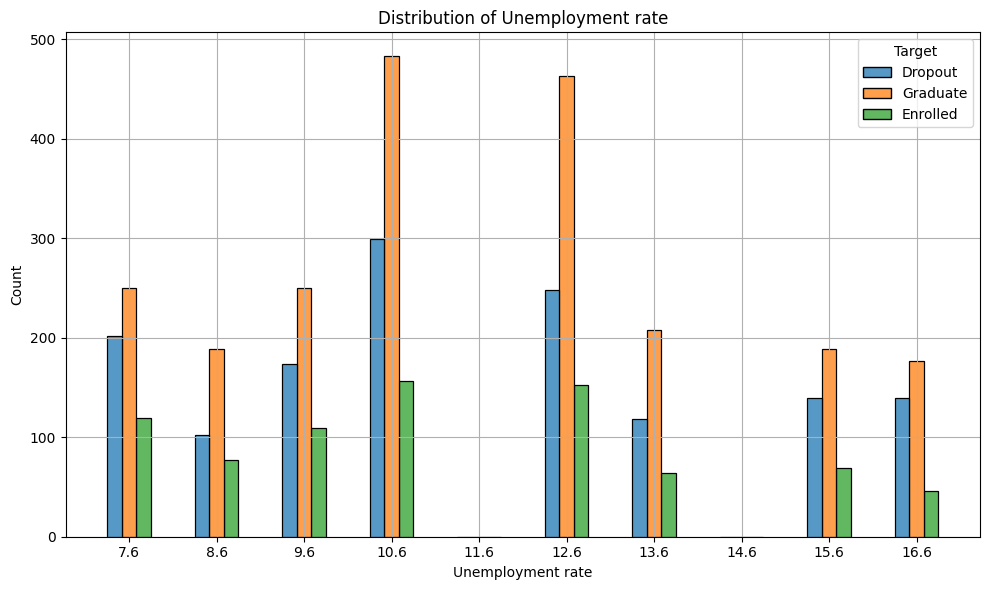

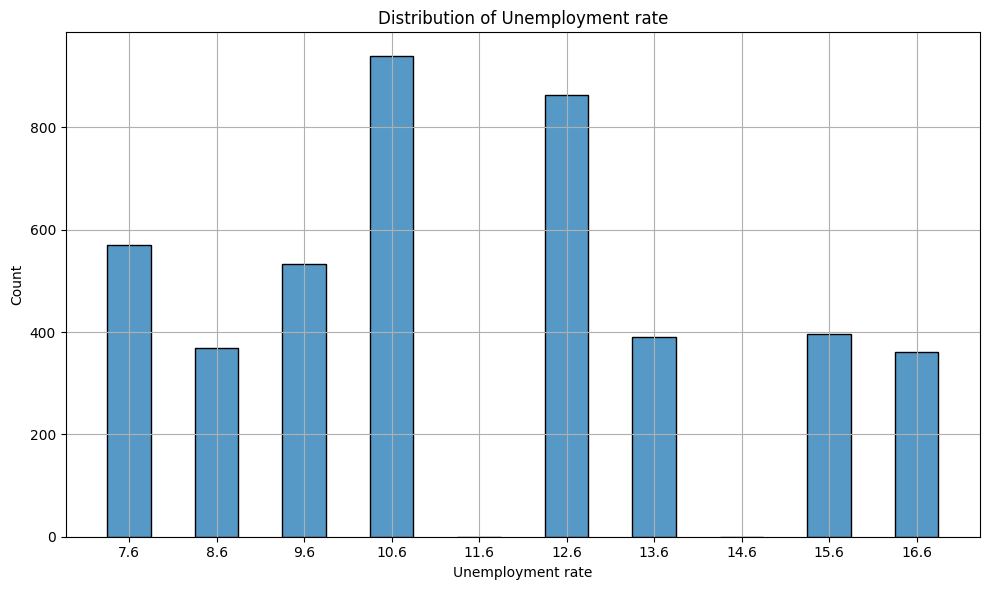

In [352]:
original = "Unemployment rate"
encoded = "Unemployment rate"
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {previous_qualification_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


Unemployment rate (%)


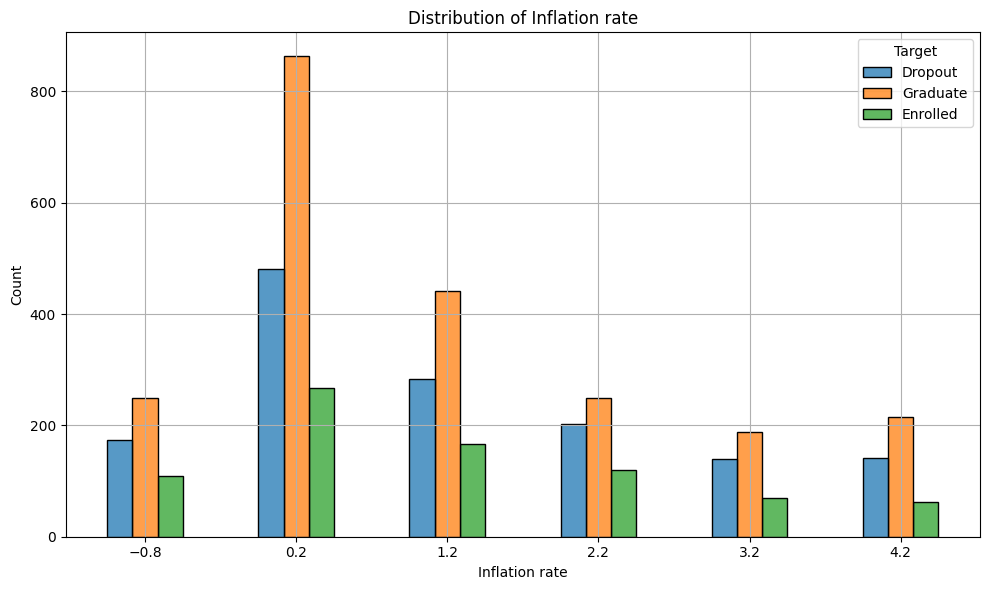

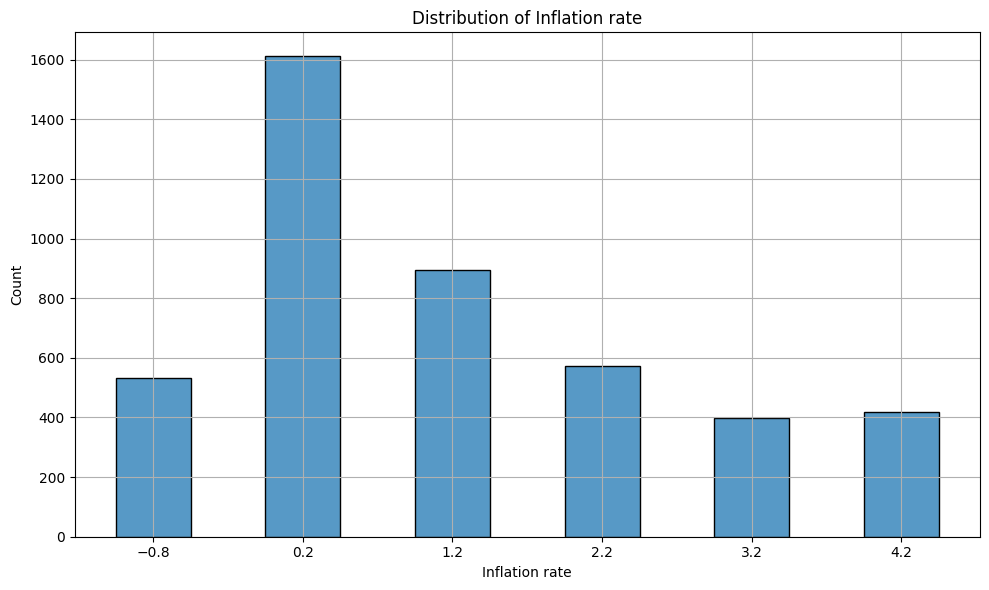

In [353]:
original = "Inflation rate"
encoded = "Inflation rate"
# le = LabelEncoder()
# df[encoded] = le.fit_transform(df[original])

# a = le.transform(df[original].unique())
# sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

# for j, k in sorted_pairs:
#     print(f"{j}: {previous_qualification_dict[k]}\n")

unique_values = df[encoded].unique()
min_val = unique_values.min()
max_val = unique_values.max()
ticks = np.arange(min_val, max_val + 1)

plt.figure(figsize=(10, 6))
plt.grid()
ax = sns.histplot(data=df,x=encoded,kde=False,
    multiple="dodge",
    shrink=0.5, hue="Target", bins=len(unique_values),
    discrete=True
    )
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.grid()

ax = sns.histplot(
    data=df,
    x=encoded,
    kde=False,
    multiple="dodge",
    shrink=0.5,
    bins=len(unique_values),
    discrete=True
)
plt.xticks(ticks)
plt.title(f"Distribution of {original}")
plt.tight_layout()
plt.show()


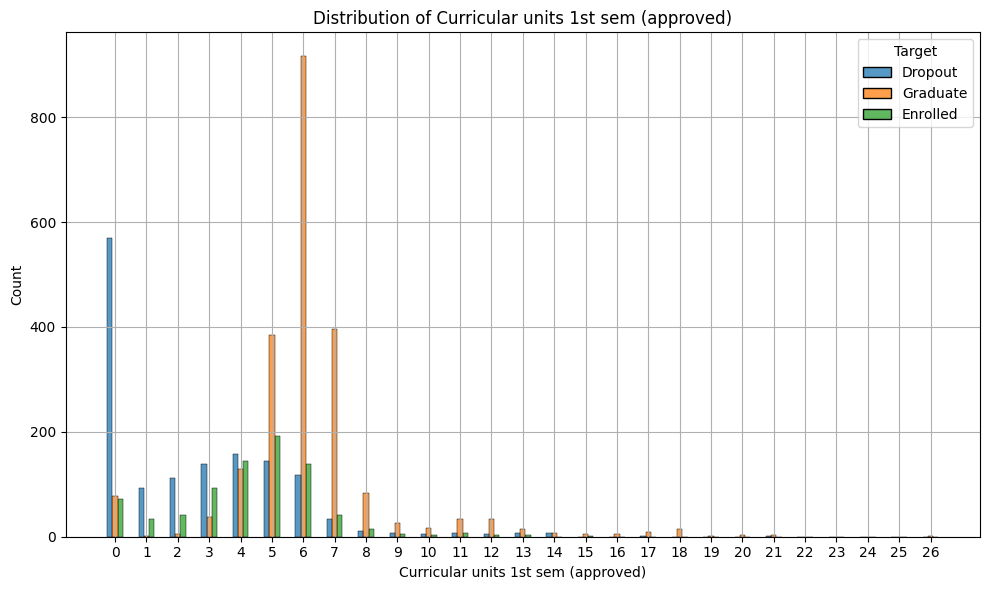

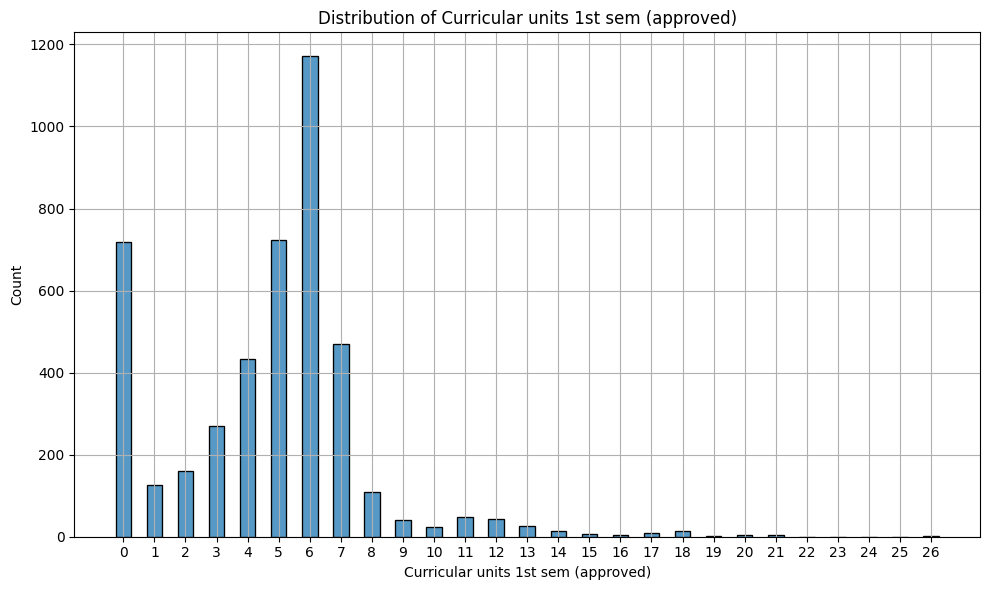

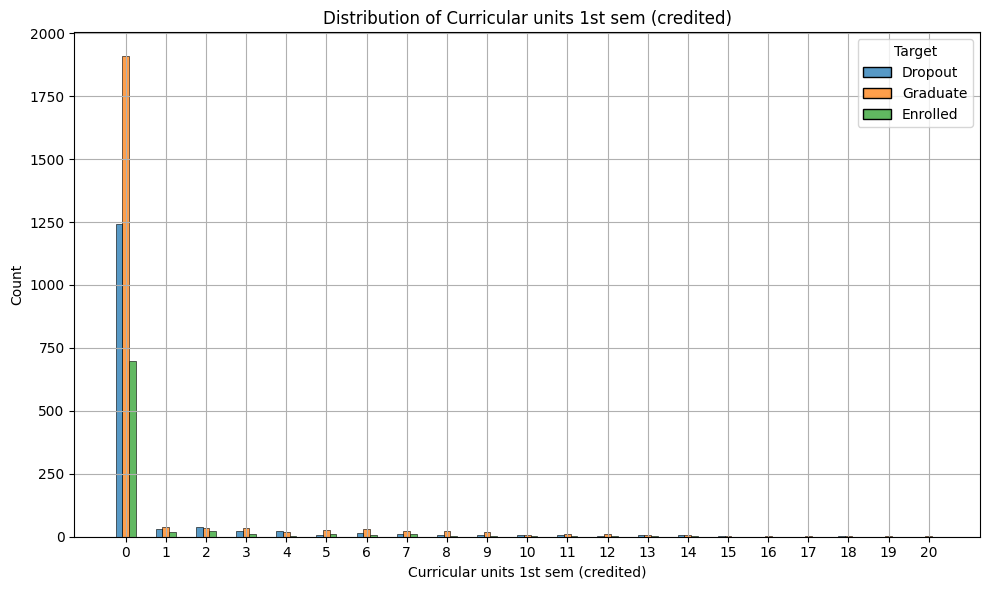

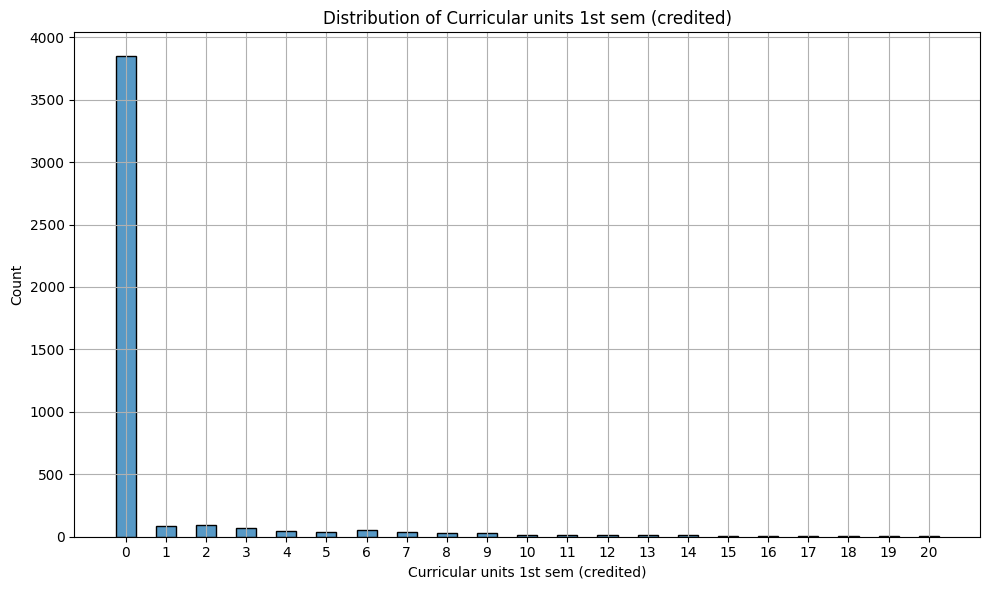

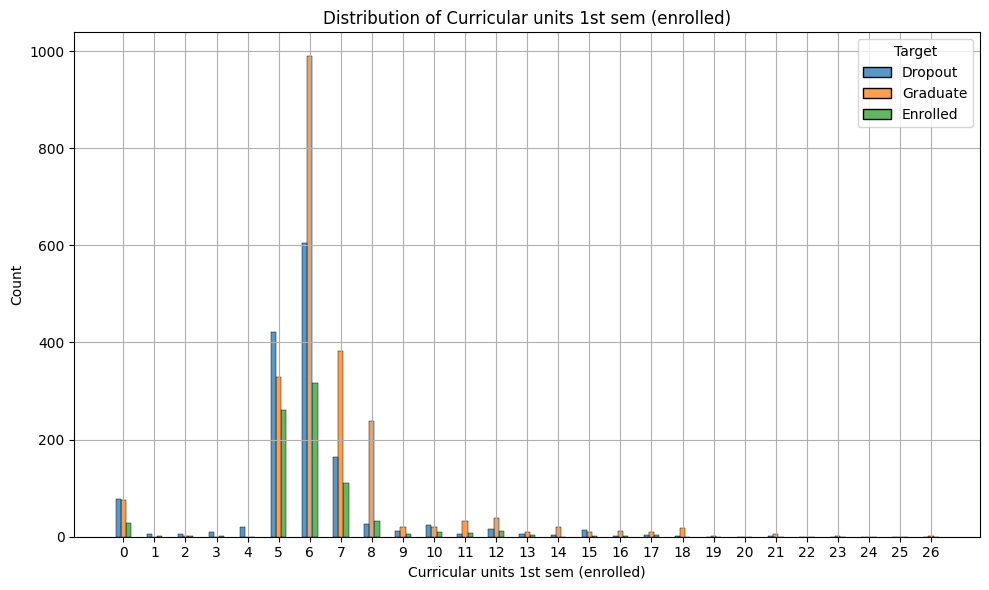

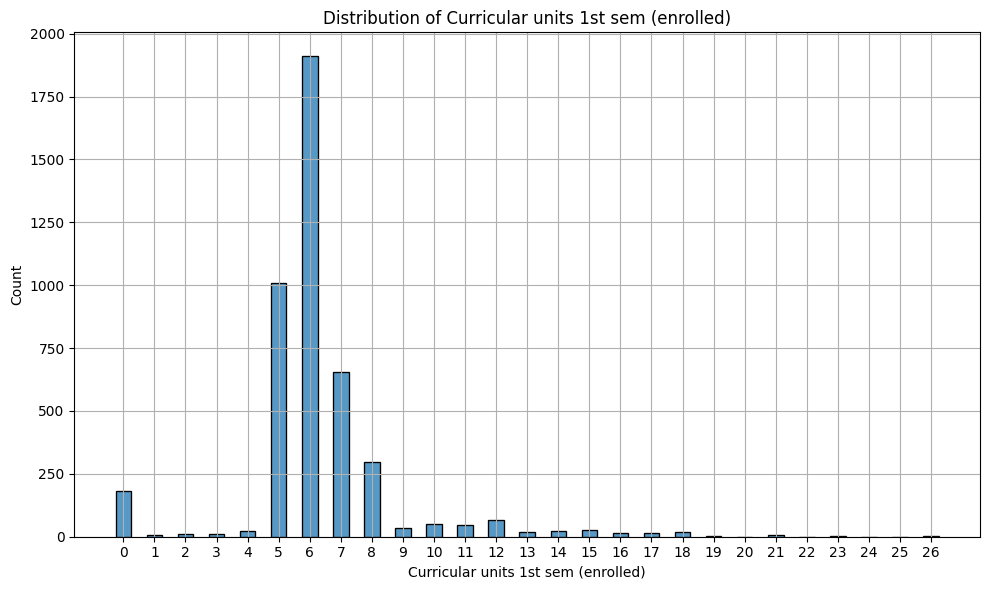

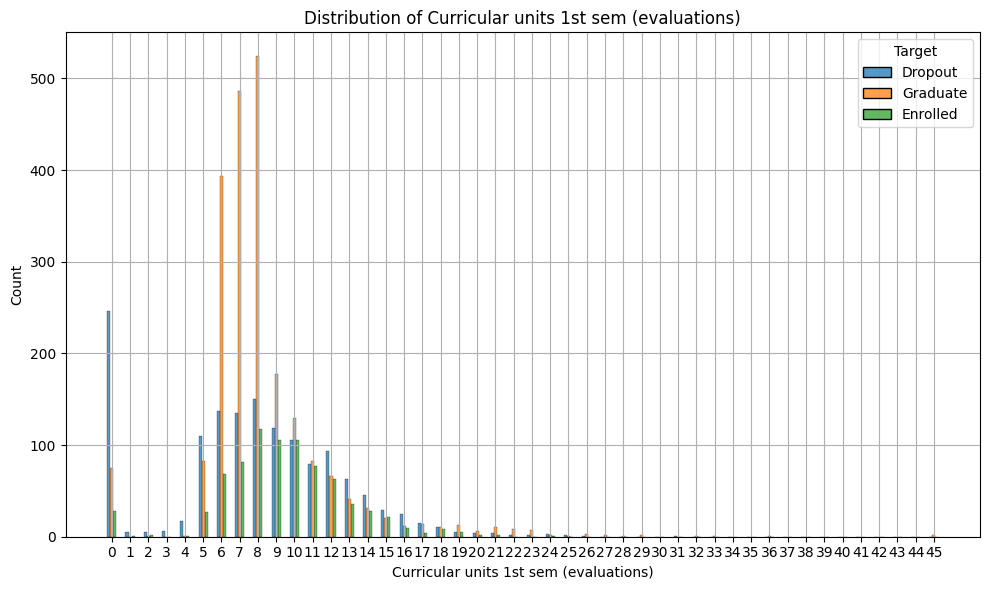

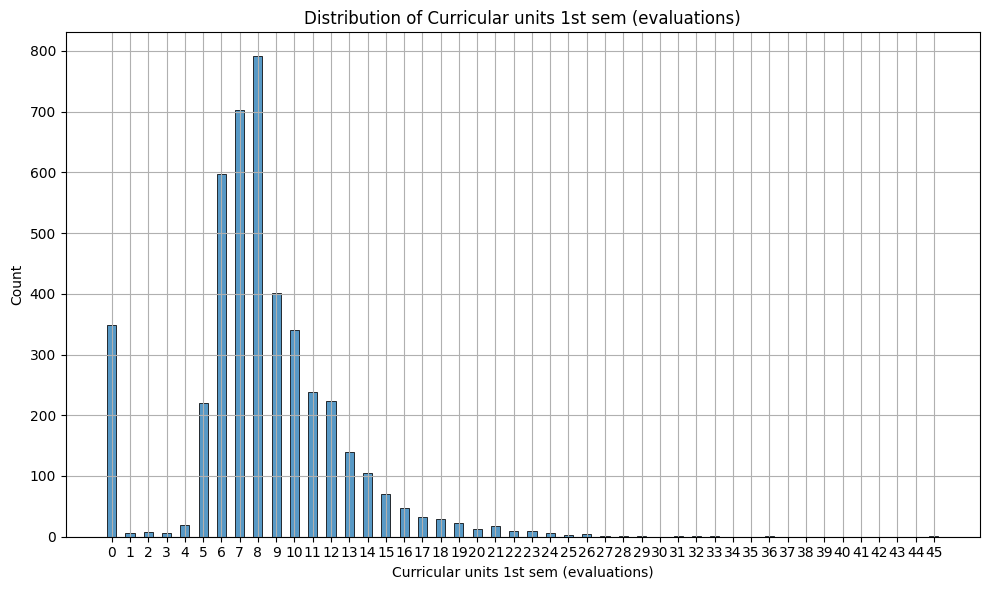

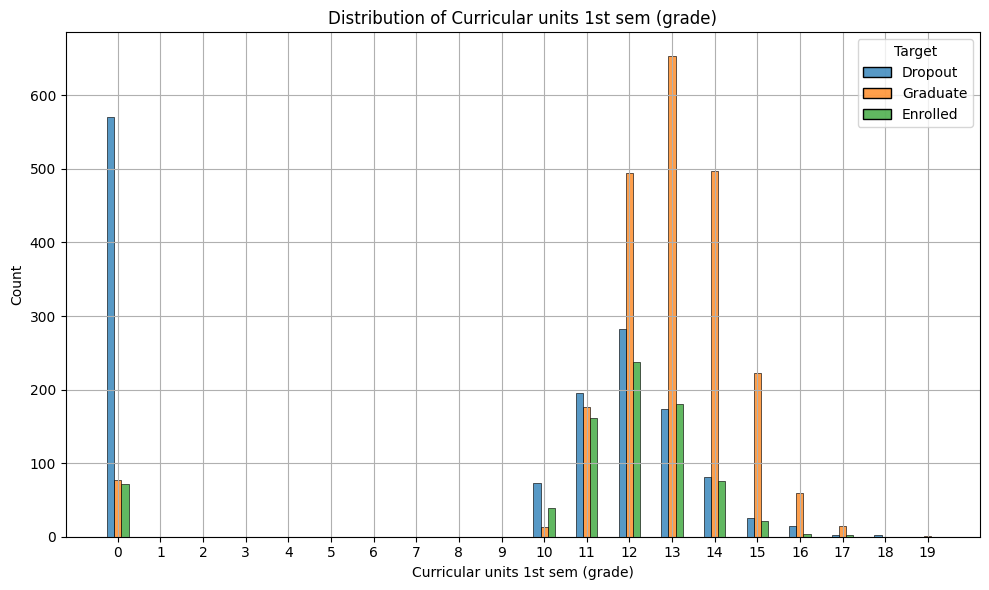

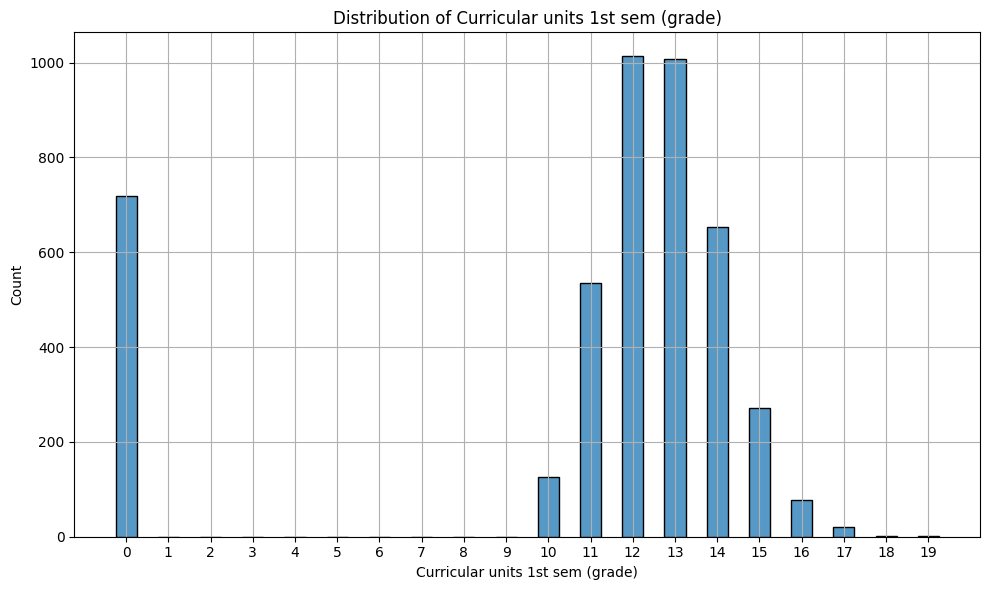

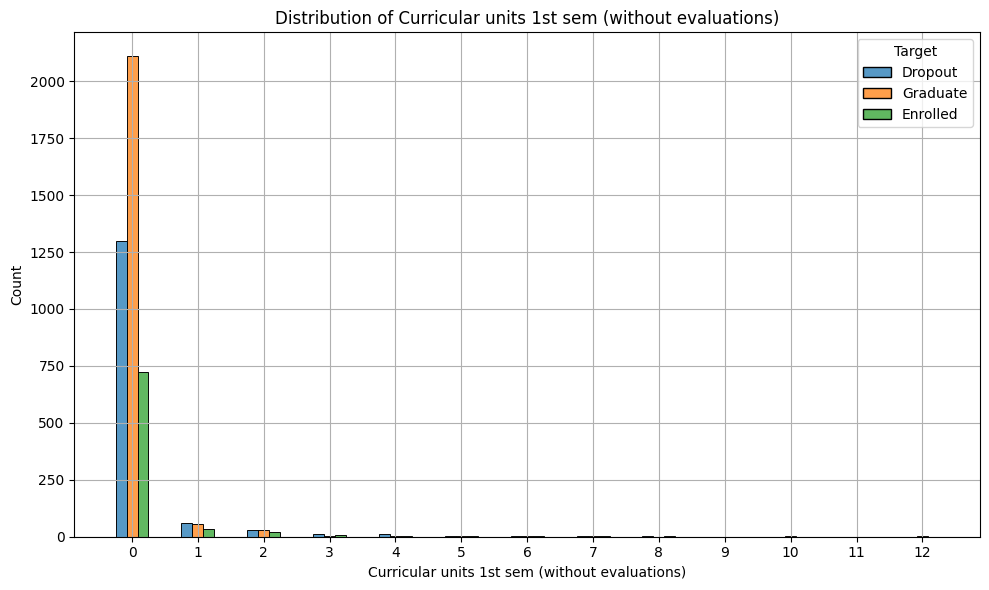

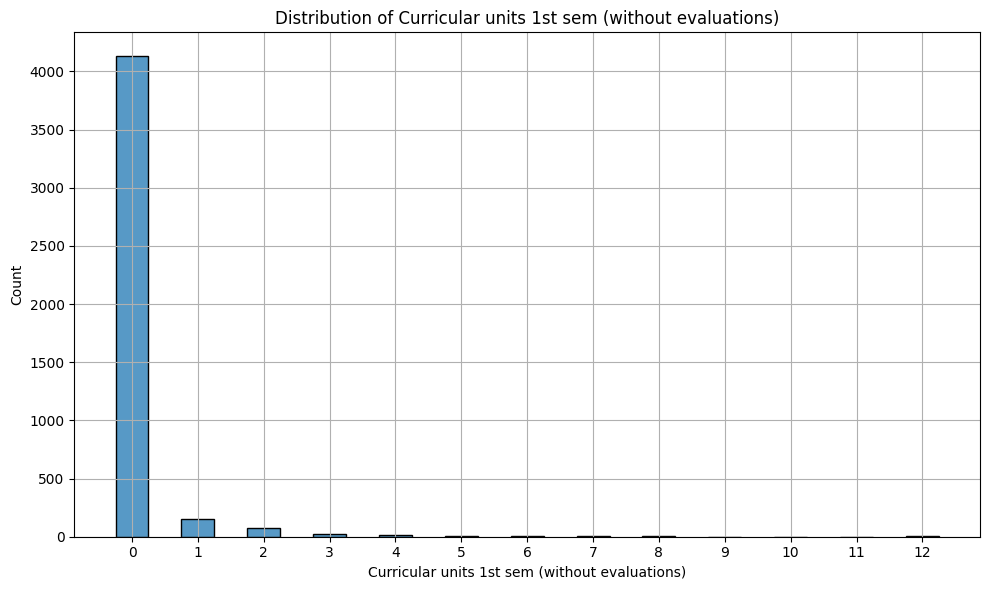

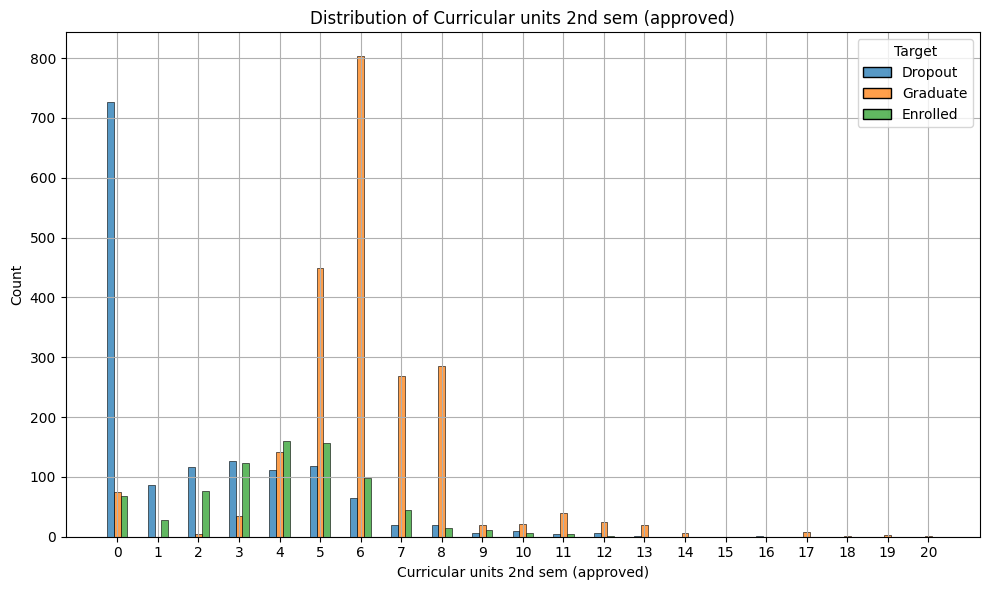

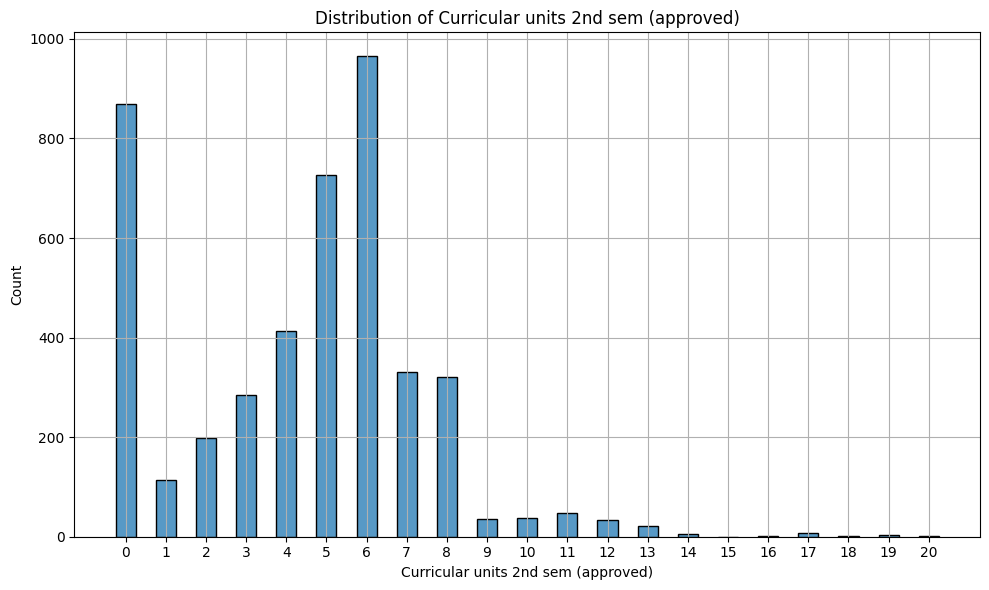

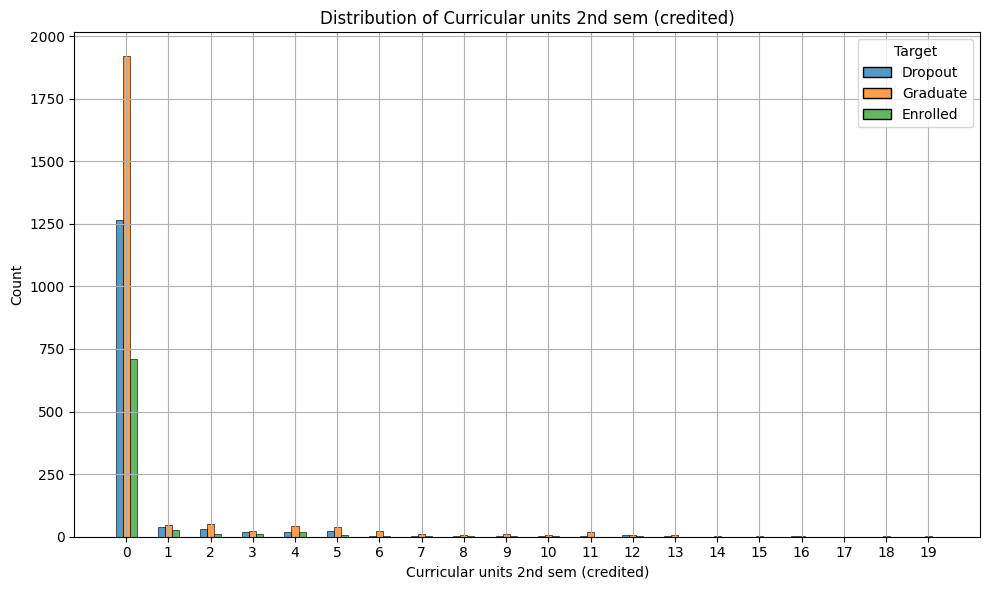

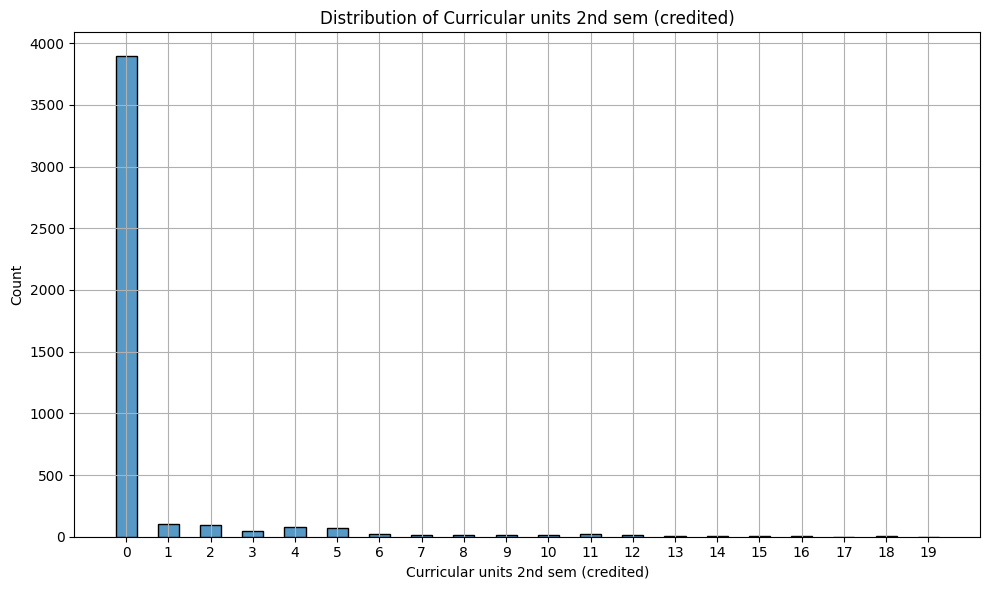

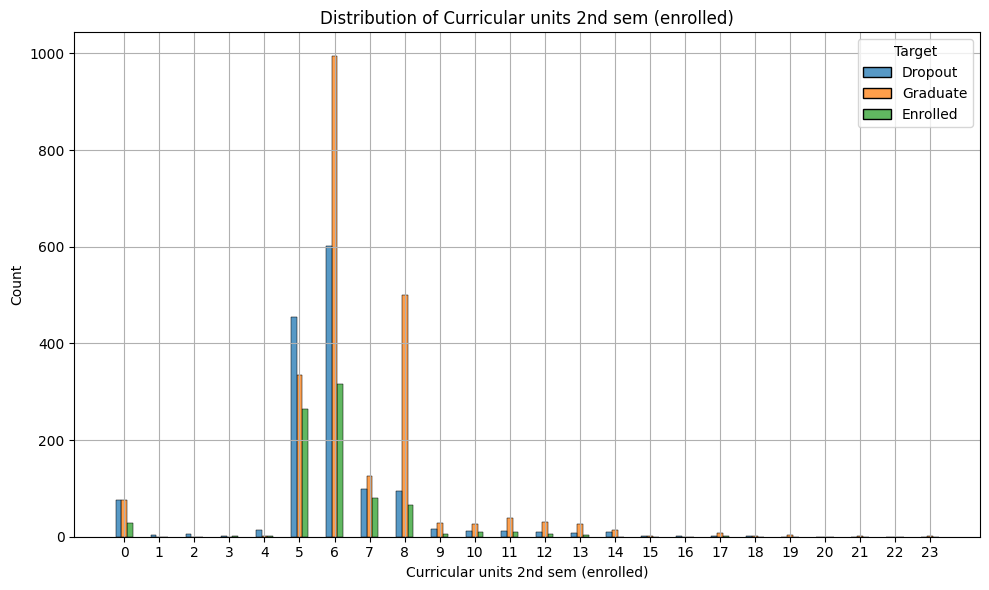

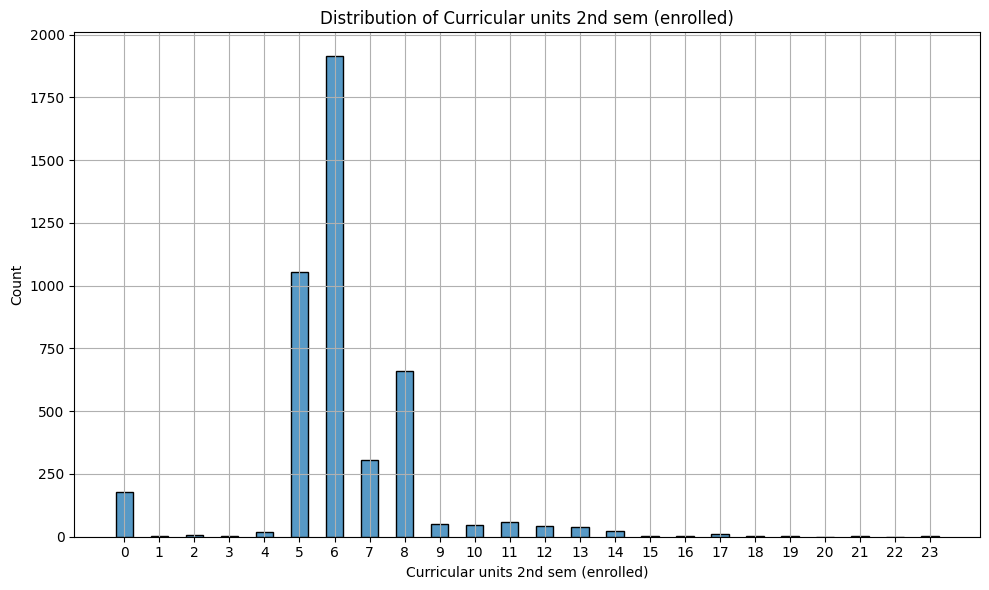

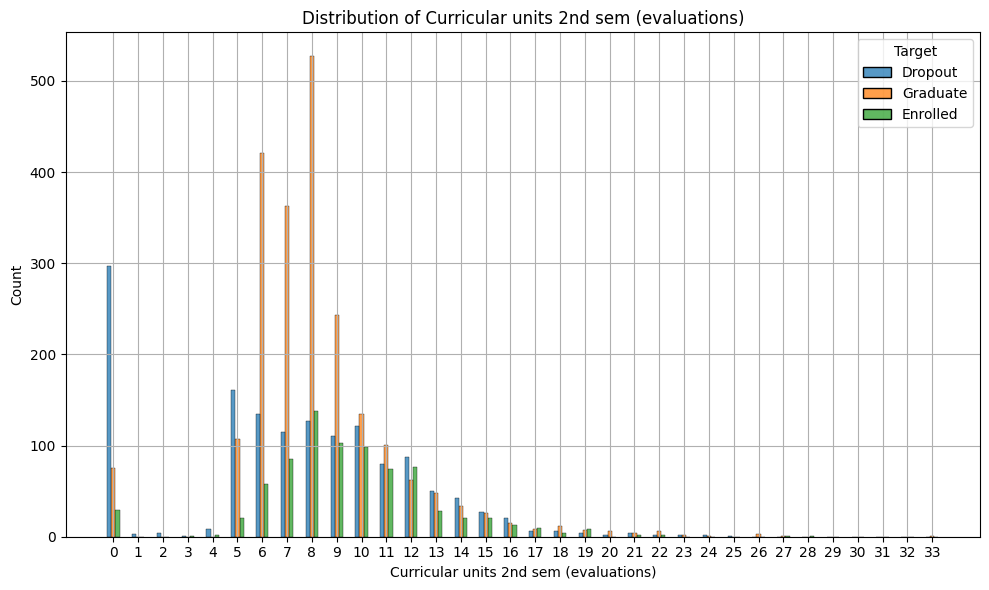

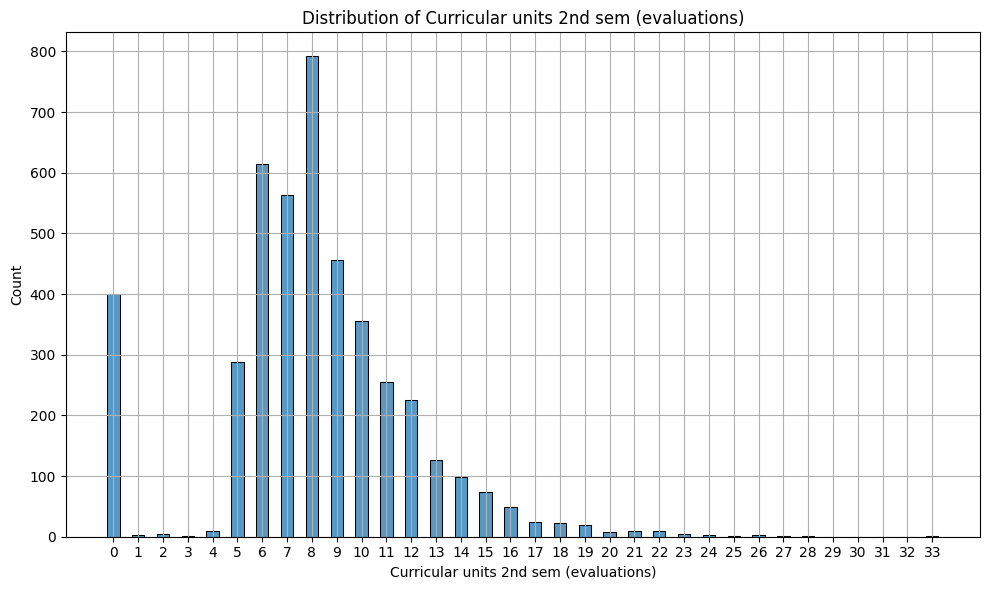

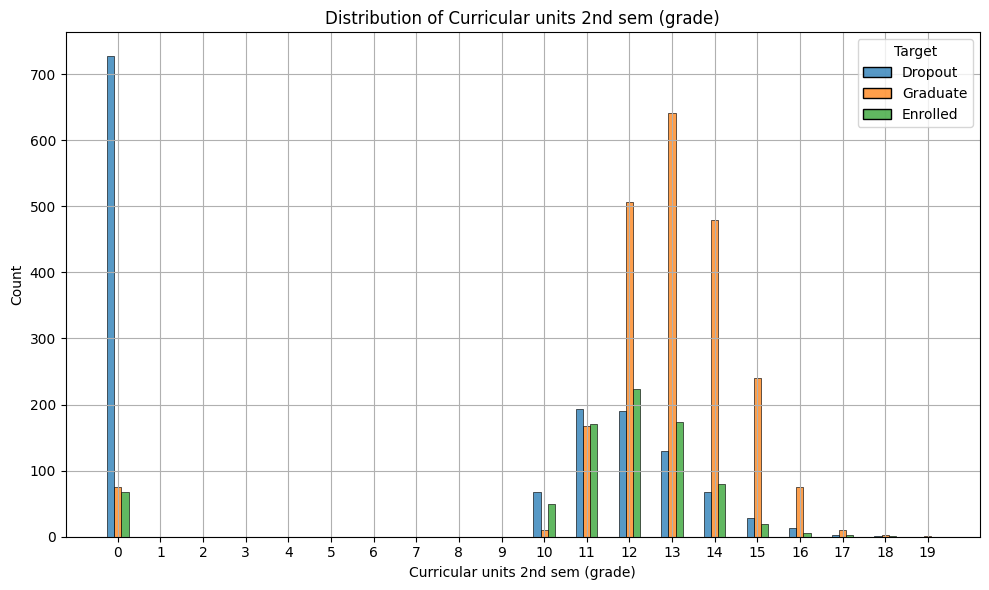

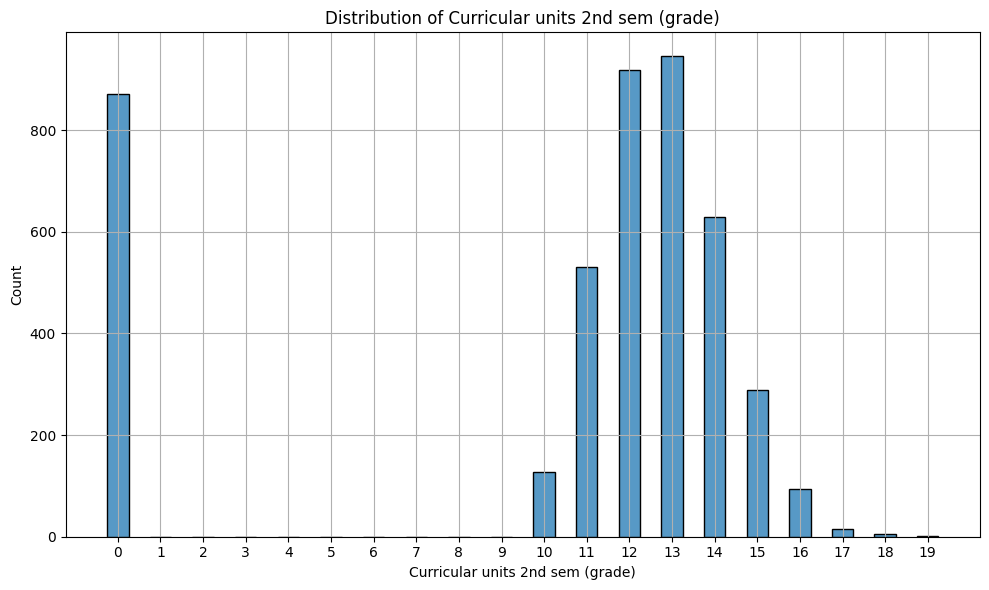

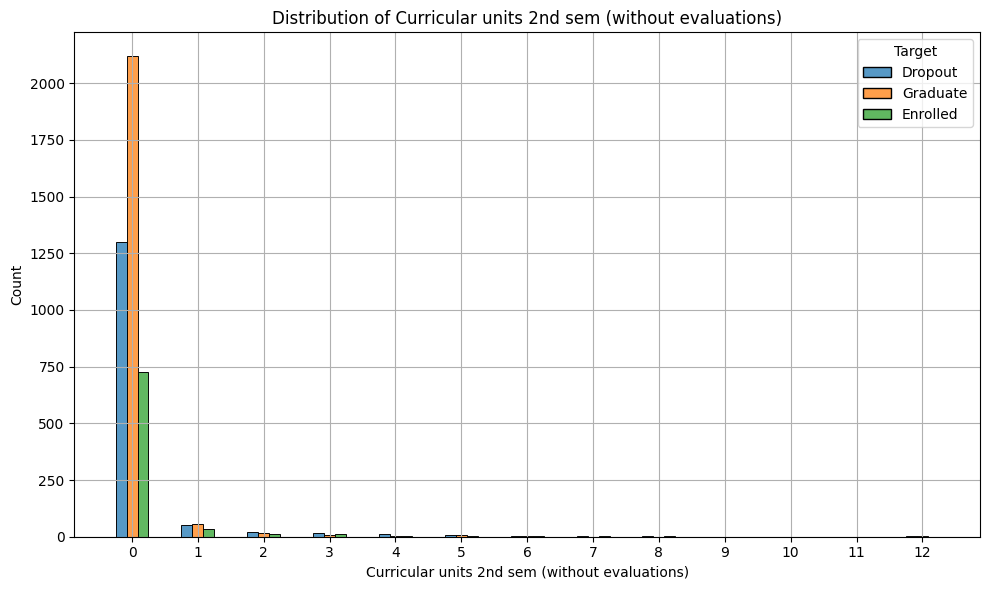

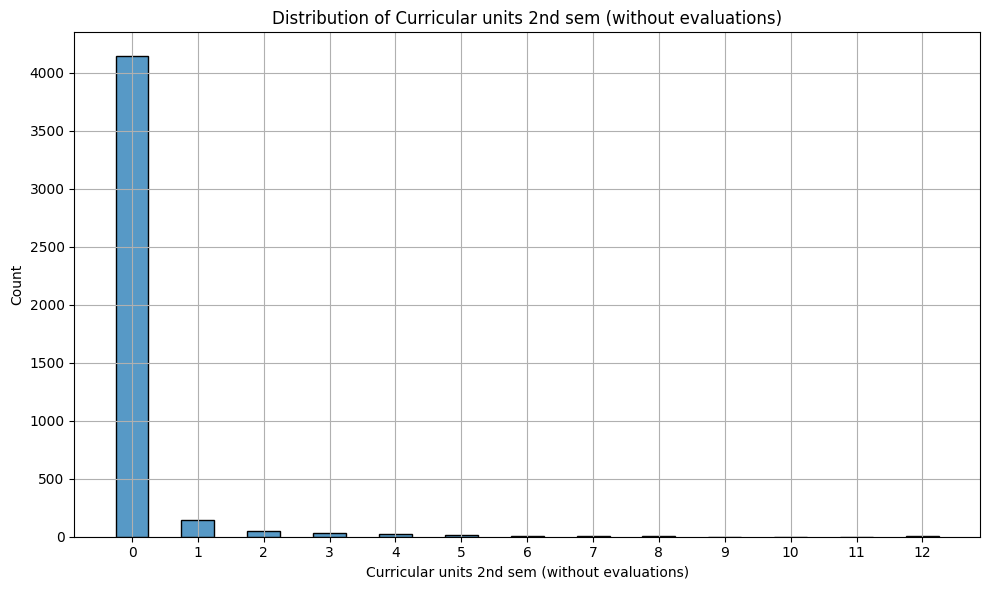

In [354]:
for k in ["Curricular units 1st sem (approved)",
"Curricular units 1st sem (credited)",
"Curricular units 1st sem (enrolled)",
"Curricular units 1st sem (evaluations)",
"Curricular units 1st sem (grade)",
"Curricular units 1st sem (without evaluations)",
"Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (credited)",
"Curricular units 2nd sem (enrolled)",
"Curricular units 2nd sem (evaluations)",
"Curricular units 2nd sem (grade)",
"Curricular units 2nd sem (without evaluations)"]:
    original = k
    encoded = k
    # le = LabelEncoder()
    # df[encoded] = le.fit_transform(df[original])

    # a = le.transform(df[original].unique())
    # sorted_pairs = sorted(zip(a, le.inverse_transform(a))) 

    # for j, k in sorted_pairs:
    #     print(f"{j}: {previous_qualification_dict[k]}\n")

    unique_values = df[encoded].unique()
    min_val = unique_values.min()
    max_val = unique_values.max()
    ticks = np.arange(min_val, max_val + 1)

    plt.figure(figsize=(10, 6))
    plt.grid()
    ax = sns.histplot(data=df,x=encoded,kde=False,
        multiple="dodge",
        shrink=0.5, hue="Target", bins=len(unique_values),
        discrete=True
        )
    plt.xticks(ticks)
    plt.title(f"Distribution of {original}")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.grid()

    ax = sns.histplot(
        data=df,
        x=encoded,
        kde=False,
        multiple="dodge",
        shrink=0.5,
        bins=len(unique_values),
        discrete=True
    )
    plt.xticks(ticks)
    plt.title(f"Distribution of {original}")
    plt.tight_layout()
    plt.show()


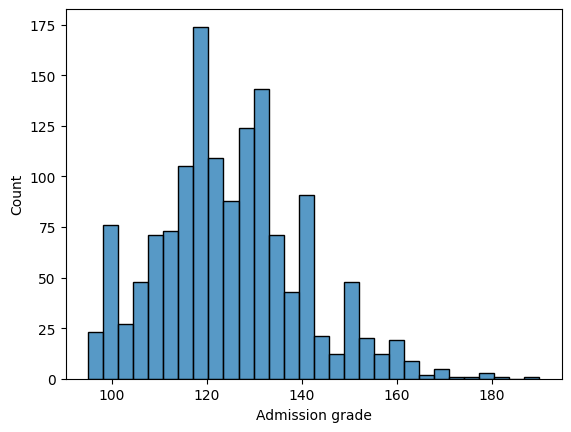

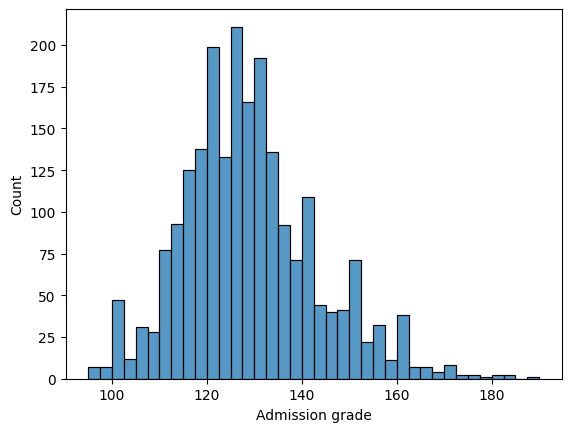

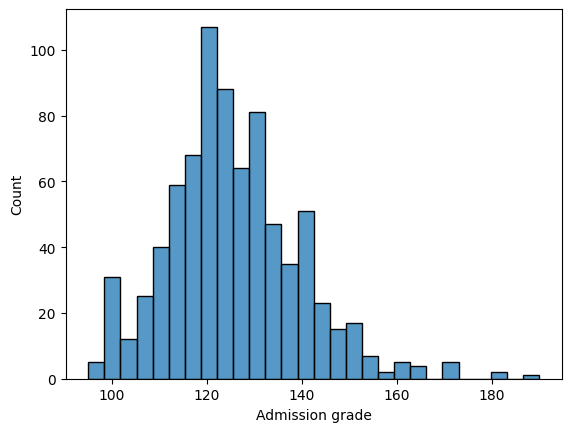

In [355]:
sns.histplot(x=df.loc[df['Target'] == 'Dropout', 'Admission grade'])
plt.show()
sns.histplot(x=df.loc[df['Target'] == 'Graduate', 'Admission grade'])
plt.show()
sns.histplot(x=df.loc[df['Target'] == 'Enrolled', 'Admission grade'])
plt.show()
